In [14]:
# For suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [108]:
#importing libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')

In [109]:
#importing dataset
df=pd.read_csv('application_data.csv')

In [113]:
df.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0           Family         State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0    Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loan

In [18]:
df.shape #  307511=rows , 122=columns

(307511, 122)

In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [20]:
df.isna().sum().sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 214865
COMMONAREA_AVG                  214865
COMMONAREA_MODE                 214865
NONLIVINGAPARTMENTS_MODE        213514
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAPARTMENTS_MEDI        213514
FONDKAPREMONT_MODE              210295
LIVINGAPARTMENTS_MODE           210199
LIVINGAPARTMENTS_AVG            210199
LIVINGAPARTMENTS_MEDI           210199
FLOORSMIN_AVG                   208642
FLOORSMIN_MODE                  208642
FLOORSMIN_MEDI                  208642
YEARS_BUILD_MEDI                204488
YEARS_BUILD_MODE                204488
YEARS_BUILD_AVG                 204488
OWN_CAR_AGE                     202929
LANDAREA_MEDI                   182590
LANDAREA_MODE                   182590
LANDAREA_AVG                    182590
BASEMENTAREA_MEDI               179943
BASEMENTAREA_AVG                179943
BASEMENTAREA_MODE               179943
EXT_SOURCE_1                    173378
NONLIVINGAREA_MODE              169682
NONLIVINGAREA_AVG        

In [21]:
x=len(df)/2
x

153755.5

In [22]:
df.columns[df.isnull().sum() < x ]

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
     

In [23]:
len(df.columns[df.isnull().sum()<x])

81

In [24]:
df=df[df.columns[df.isnull().sum()<x]]
df.shape

(307511, 81)

In [25]:
df.isna().sum().sort_values(ascending=False).head(60)

FLOORSMAX_AVG                   153020
FLOORSMAX_MODE                  153020
FLOORSMAX_MEDI                  153020
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BEGINEXPLUATATION_MEDI    150007
TOTALAREA_MODE                  148431
EMERGENCYSTATE_MODE             145755
OCCUPATION_TYPE                  96391
EXT_SOURCE_3                     60965
AMT_REQ_CREDIT_BUREAU_YEAR       41519
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
NAME_TYPE_SUITE                   1292
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
OBS_30_CNT_SOCIAL_CIRCLE          1021
EXT_SOURCE_2                       660
AMT_GOODS_PRICE                    278
AMT_ANNUITY                         12
CNT_FAM_MEMBERS                      2
DAYS_LAST_PHONE_CHANGE   

In [26]:
df.describe().columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
  

In [27]:
list(set(df.columns)-set(df.describe().columns))

['NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS']

In [28]:
# Defining a function to find out the number and percentage of missing values in a Dataframe

def df_missing(df):
    
    missing_values_sum = df.isnull().sum()   
        
    missing_values_per = (df.isnull().sum()*100/len(df)).round(1) 
    
    missing_info = pd.concat([missing_values_sum,missing_values_per],axis=1) 
    
    missing_info.columns = ['Total', '% of NA values'] 
    
    missing_info.sort_values(by = '% of NA values',ascending=False )
           

        
    missing_info = missing_info[missing_info.iloc[:,1] != 0].sort_values('% of NA values', ascending=False)
    
    return missing_info

In [29]:
df_missing(df)

Total  % of NA values
FLOORSMAX_AVG                 153020            49.8
FLOORSMAX_MODE                153020            49.8
FLOORSMAX_MEDI                153020            49.8
YEARS_BEGINEXPLUATATION_AVG   150007            48.8
YEARS_BEGINEXPLUATATION_MODE  150007            48.8
YEARS_BEGINEXPLUATATION_MEDI  150007            48.8
TOTALAREA_MODE                148431            48.3
EMERGENCYSTATE_MODE           145755            47.4
OCCUPATION_TYPE                96391            31.3
EXT_SOURCE_3                   60965            19.8
AMT_REQ_CREDIT_BUREAU_HOUR     41519            13.5
AMT_REQ_CREDIT_BUREAU_QRT      41519            13.5
AMT_REQ_CREDIT_BUREAU_MON      41519            13.5
AMT_REQ_CREDIT_BUREAU_WEEK     41519            13.5
AMT_REQ_CREDIT_BUREAU_DAY      41519            13.5
AMT_REQ_CREDIT_BUREAU_YEAR     41519            13.5
NAME_TYPE_SUITE                 1292             0.4
DEF_60_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_60_CNT_SOCIAL_CIRCLE        1021             0.3
DEF_30_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_30_CNT_SOCIAL_CIRCLE        1021             0.3
EXT_SOURCE_2                     660             0.2
AMT_GOODS_PRICE                  278             0.1

In [30]:
df['FLOORSMAX_AVG'].mode()

0    0.1667
dtype: float64

In [31]:
df['FLOORSMAX_AVG'].describe()

count    154491.000000
mean          0.226282
std           0.144641
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

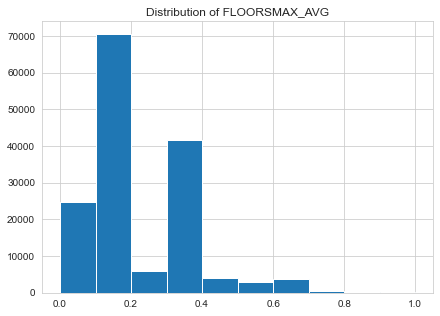

In [32]:
plt.figure(figsize=(7,5))
plt.hist(df['FLOORSMAX_AVG'],bins=10)
plt.title("Distribution of FLOORSMAX_AVG")
plt.show()

In [33]:
df['FLOORSMAX_AVG'] = df['FLOORSMAX_AVG'].fillna(round(df['FLOORSMAX_AVG'].mean(),2))

In [34]:
df['FLOORSMAX_AVG'].isna().sum()

0

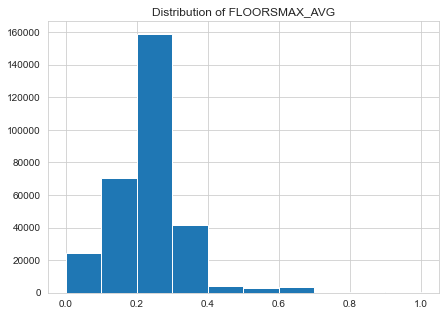

In [35]:
plt.figure(figsize=(7,5))
plt.hist(df['FLOORSMAX_AVG'])
plt.title("Distribution of FLOORSMAX_AVG")
plt.show()

In [36]:
df_missing(df)

Total  % of NA values
FLOORSMAX_MODE                153020            49.8
FLOORSMAX_MEDI                153020            49.8
YEARS_BEGINEXPLUATATION_AVG   150007            48.8
YEARS_BEGINEXPLUATATION_MODE  150007            48.8
YEARS_BEGINEXPLUATATION_MEDI  150007            48.8
TOTALAREA_MODE                148431            48.3
EMERGENCYSTATE_MODE           145755            47.4
OCCUPATION_TYPE                96391            31.3
EXT_SOURCE_3                   60965            19.8
AMT_REQ_CREDIT_BUREAU_HOUR     41519            13.5
AMT_REQ_CREDIT_BUREAU_QRT      41519            13.5
AMT_REQ_CREDIT_BUREAU_MON      41519            13.5
AMT_REQ_CREDIT_BUREAU_WEEK     41519            13.5
AMT_REQ_CREDIT_BUREAU_DAY      41519            13.5
AMT_REQ_CREDIT_BUREAU_YEAR     41519            13.5
NAME_TYPE_SUITE                 1292             0.4
DEF_60_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_60_CNT_SOCIAL_CIRCLE        1021             0.3
DEF_30_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_30_CNT_SOCIAL_CIRCLE        1021             0.3
EXT_SOURCE_2                     660             0.2
AMT_GOODS_PRICE                  278             0.1

In [37]:
cat_var = df[df_missing(df).index].select_dtypes('object')
cat_var.columns

Index(['EMERGENCYSTATE_MODE', 'OCCUPATION_TYPE', 'NAME_TYPE_SUITE'], dtype='object')

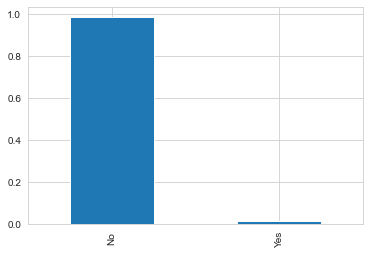

In [38]:
df["EMERGENCYSTATE_MODE"].value_counts(normalize=True).plot(kind='bar');

In [39]:
df["EMERGENCYSTATE_MODE"].mode()[0]

'No'

In [40]:
df["EMERGENCYSTATE_MODE"]= df["EMERGENCYSTATE_MODE"].fillna(df["EMERGENCYSTATE_MODE"].mode()[0])
df["EMERGENCYSTATE_MODE"].value_counts()

No     305183
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

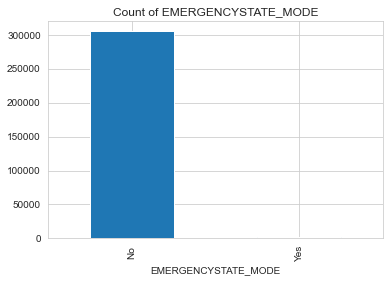

In [41]:
df["EMERGENCYSTATE_MODE"].value_counts().plot(kind='bar')
plt.title("Count of EMERGENCYSTATE_MODE")
plt.xlabel("EMERGENCYSTATE_MODE")
plt.show()

In [42]:
df_missing(df)

Total  % of NA values
FLOORSMAX_MODE                153020            49.8
FLOORSMAX_MEDI                153020            49.8
YEARS_BEGINEXPLUATATION_AVG   150007            48.8
YEARS_BEGINEXPLUATATION_MODE  150007            48.8
YEARS_BEGINEXPLUATATION_MEDI  150007            48.8
TOTALAREA_MODE                148431            48.3
OCCUPATION_TYPE                96391            31.3
EXT_SOURCE_3                   60965            19.8
AMT_REQ_CREDIT_BUREAU_HOUR     41519            13.5
AMT_REQ_CREDIT_BUREAU_QRT      41519            13.5
AMT_REQ_CREDIT_BUREAU_MON      41519            13.5
AMT_REQ_CREDIT_BUREAU_WEEK     41519            13.5
AMT_REQ_CREDIT_BUREAU_DAY      41519            13.5
AMT_REQ_CREDIT_BUREAU_YEAR     41519            13.5
NAME_TYPE_SUITE                 1292             0.4
DEF_60_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_60_CNT_SOCIAL_CIRCLE        1021             0.3
DEF_30_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_30_CNT_SOCIAL_CIRCLE        1021             0.3
EXT_SOURCE_2                     660             0.2
AMT_GOODS_PRICE                  278             0.1

In [43]:
df['OCCUPATION_TYPE'].head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

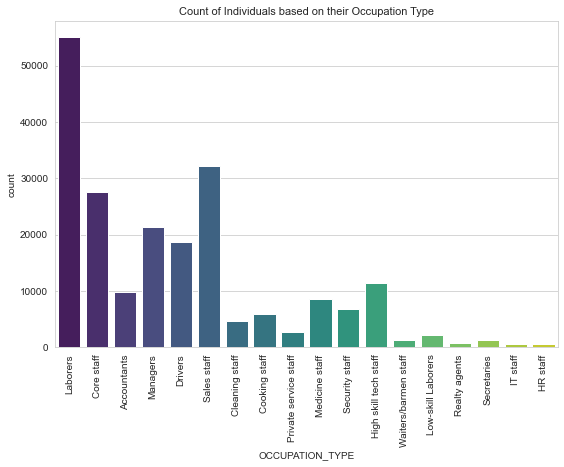

In [44]:
plt.figure(figsize=(9,6))
sns.countplot(x = 'OCCUPATION_TYPE', data=df,palette='viridis',)
plt.title("Count of Individuals based on their Occupation Type",size=11)
plt.xticks(rotation = 90);

In [45]:
average_income = pd.pivot_table(data = df,index="OCCUPATION_TYPE",aggfunc='mean')['AMT_INCOME_TOTAL']
average_income = round(average_income,2).sort_values(ascending = True)
average_income


OCCUPATION_TYPE
Cleaning staff           130790.90
Low-skill Laborers       133228.00
Cooking staff            138396.51
Waiters/barmen staff     144272.58
Security staff           149662.70
Medicine staff           149709.64
Sales staff              152302.87
Secretaries              160541.66
Laborers                 166357.48
Core staff               172656.70
Private service staff    182334.81
High skill tech staff    182842.05
Drivers                  187011.61
HR staff                 188916.28
Accountants              194578.36
Realty agents            195003.99
IT staff                 213465.60
Managers                 260336.68
Name: AMT_INCOME_TOTAL, dtype: float64

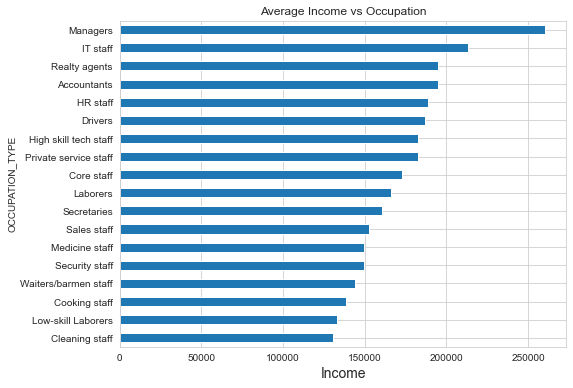

In [46]:
plt.figure(figsize=(8,6))
average_income.plot(kind='barh',title='Average Income vs Occupation')
plt.xlabel('Income',size=14);

In [47]:
df['OCCUPATION_TYPE'].mode()

0    Laborers
dtype: object

In [48]:
cols = list(set(df.columns) - set(df.describe().columns))
df[cols]= df[cols].fillna(df.mode().iloc[0])

In [49]:
df_missing(df) 

Total  % of NA values
FLOORSMAX_MODE                153020            49.8
FLOORSMAX_MEDI                153020            49.8
YEARS_BEGINEXPLUATATION_AVG   150007            48.8
YEARS_BEGINEXPLUATATION_MODE  150007            48.8
YEARS_BEGINEXPLUATATION_MEDI  150007            48.8
TOTALAREA_MODE                148431            48.3
EXT_SOURCE_3                   60965            19.8
AMT_REQ_CREDIT_BUREAU_YEAR     41519            13.5
AMT_REQ_CREDIT_BUREAU_HOUR     41519            13.5
AMT_REQ_CREDIT_BUREAU_QRT      41519            13.5
AMT_REQ_CREDIT_BUREAU_MON      41519            13.5
AMT_REQ_CREDIT_BUREAU_WEEK     41519            13.5
AMT_REQ_CREDIT_BUREAU_DAY      41519            13.5
OBS_30_CNT_SOCIAL_CIRCLE        1021             0.3
DEF_60_CNT_SOCIAL_CIRCLE        1021             0.3
OBS_60_CNT_SOCIAL_CIRCLE        1021             0.3
DEF_30_CNT_SOCIAL_CIRCLE        1021             0.3
EXT_SOURCE_2                     660             0.2
AMT_GOODS_PRICE                  278             0.1

In [50]:
null_var = df.isnull().sum()
null_var[null_var>0]

AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
CNT_FAM_MEMBERS                      2
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
DAYS_LAST_PHONE_CHANGE               1
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

In [51]:
df["AMT_ANNUITY"] = df["AMT_ANNUITY"].fillna(df["AMT_ANNUITY"].mean())
df["CNT_FAM_MEMBERS"] = df["CNT_FAM_MEMBERS"].fillna(df["CNT_FAM_MEMBERS"].mean())
df["DAYS_LAST_PHONE_CHANGE"] = df["DAYS_LAST_PHONE_CHANGE"].fillna(df["DAYS_LAST_PHONE_CHANGE"].mean())

In [52]:
null_var = df.isnull().sum()
null_var[null_var>0]

AMT_GOODS_PRICE                    278
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BEGINEXPLUATATION_MODE    150007
FLOORSMAX_MODE                  153020
YEARS_BEGINEXPLUATATION_MEDI    150007
FLOORSMAX_MEDI                  153020
TOTALAREA_MODE                  148431
OBS_30_CNT_SOCIAL_CIRCLE          1021
DEF_30_CNT_SOCIAL_CIRCLE          1021
OBS_60_CNT_SOCIAL_CIRCLE          1021
DEF_60_CNT_SOCIAL_CIRCLE          1021
AMT_REQ_CREDIT_BUREAU_HOUR       41519
AMT_REQ_CREDIT_BUREAU_DAY        41519
AMT_REQ_CREDIT_BUREAU_WEEK       41519
AMT_REQ_CREDIT_BUREAU_MON        41519
AMT_REQ_CREDIT_BUREAU_QRT        41519
AMT_REQ_CREDIT_BUREAU_YEAR       41519
dtype: int64

In [53]:
df_missing(df).index 


Index(['FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE'], dtype='object')

In [114]:
df[df_missing(df).index] = df[df_missing(df).index].fillna(value=df[df_missing(df).index].mean())

In [55]:
df_missing(df)

Empty DataFrame
Columns: [Total, % of NA values]
Index: []

In [56]:
df[df.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, YEARS_BEGINEXPLUATATION_AVG, FLOORSMAX_AVG, YEARS_BEGINEXPLUATATION_MODE, FLOORSMAX_MODE, YEARS_BEGINEXPLUATATION_MEDI, FLOORSMAX_MEDI, TOTALAREA_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

In [57]:
df['NAME_CONTRACT_TYPE'].value_counts() 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

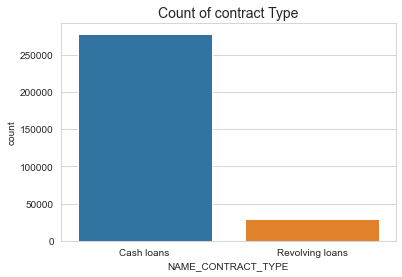

In [58]:
sns.countplot(df['NAME_CONTRACT_TYPE'])
plt.title('Count of contract Type',size=14)
plt.show()

In [59]:
gender_info = df['CODE_GENDER'].value_counts(normalize=True)*100

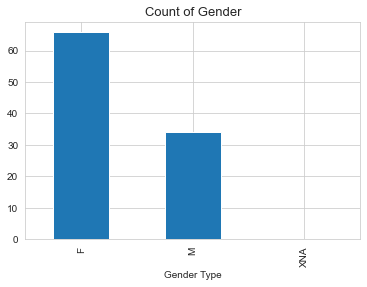

In [60]:
gender_info.plot(kind='bar')
plt.title("Count of Gender", size = 13)
plt.xlabel("Gender Type")
plt.show()  

In [61]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

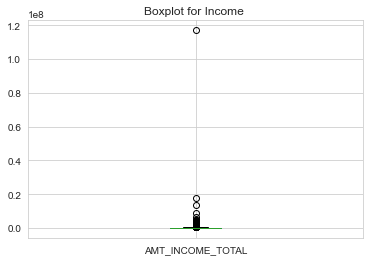

In [62]:
df['AMT_INCOME_TOTAL'].plot(kind='box')
plt.title("Boxplot for Income ")
plt.show()  

In [63]:
Q1=df['AMT_INCOME_TOTAL'].quantile(0.25)
Q3=df['AMT_INCOME_TOTAL'].quantile(0.75)

IQR=Q3-Q1

print("Q1 is " + str(Q1))
print("Q3 is " + str(Q3))
print("IQR is " + str(IQR))

Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

Q1 is 112500.0
Q3 is 202500.0
IQR is 90000.0
Lower_Whisker is -22500.0  and   Upper_Whisker is 337500.0


In [64]:
df  = df[df['AMT_INCOME_TOTAL']< Upper_Whisker] 

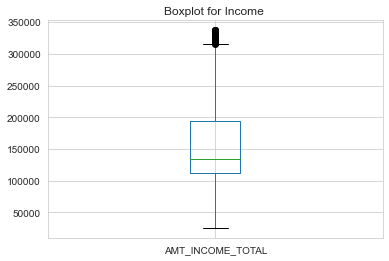

In [65]:
df['AMT_INCOME_TOTAL'].plot(kind='box') 
plt.title("Boxplot for Income ")
plt.show()

In [66]:

df.shape 

(291686, 81)

In [67]:
df['AMT_CREDIT'].describe()

count    2.916860e+05
mean     5.777803e+05
std      3.830254e+05
min      4.500000e+04
25%      2.700000e+05
50%      4.975200e+05
75%      7.871310e+05
max      3.860019e+06
Name: AMT_CREDIT, dtype: float64

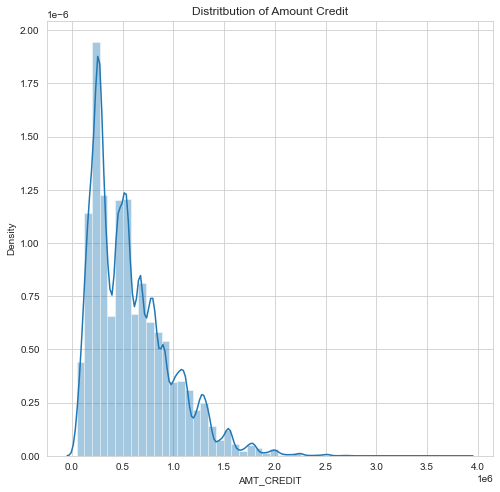

In [68]:
plt.figure(figsize=(8,8))
sns.distplot(df['AMT_CREDIT'])
plt.title("Distritbution of Amount Credit")
plt.show() 

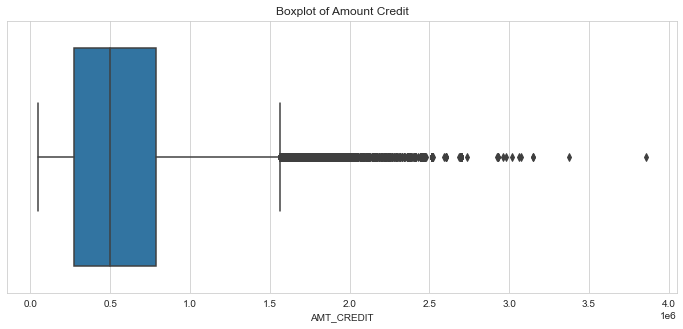

In [69]:
plt.figure(figsize=(12,5))
sns.boxplot(df['AMT_CREDIT'])
plt.title("Boxplot of Amount Credit")
plt.show()

In [70]:
Q1=df['AMT_CREDIT'].quantile(0.25)
Q3=df['AMT_CREDIT'].quantile(0.75)

IQR=Q3-Q1

print("Q1 is " + str(Q1))
print("Q3 is " + str(Q3))
print("IQR is " + str(IQR))

Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

Q1 is 270000.0
Q3 is 787131.0
IQR is 517131.0
Lower_Whisker is -505696.5  and   Upper_Whisker is 1562827.5


In [71]:
Upper_Whisker

1562827.5

In [72]:
df  = df[df['AMT_CREDIT']< Upper_Whisker] 

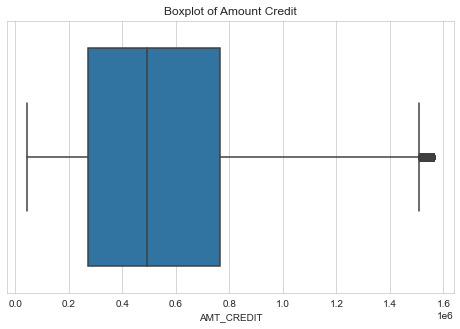

In [73]:
plt.figure(figsize=(8,5))
sns.boxplot(df['AMT_CREDIT'])
plt.title("Boxplot of Amount Credit")
plt.show()

In [74]:
df.shape

(286024, 81)

In [75]:
df['AMT_GOODS_PRICE'].describe()

count    2.860240e+05
mean     4.950417e+05
std      3.094730e+05
min      4.050000e+04
25%      2.295000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.561500e+06
Name: AMT_GOODS_PRICE, dtype: float64

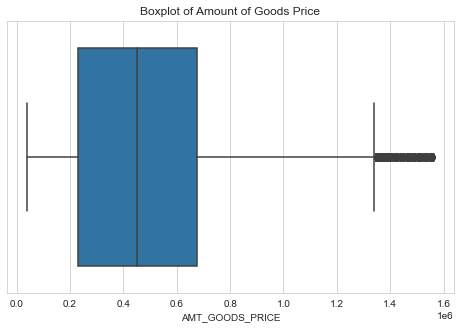

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.title("Boxplot of Amount of Goods Price")
plt.show()

In [77]:
Q1=df['AMT_GOODS_PRICE'].quantile(0.25)
Q3=df['AMT_GOODS_PRICE'].quantile(0.75)

IQR=Q3-Q1

print("Q1 is " + str(Q1))
print("Q3 is " + str(Q3))
print("IQR is " + str(IQR))

Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

Q1 is 229500.0
Q3 is 675000.0
IQR is 445500.0
Lower_Whisker is -438750.0  and   Upper_Whisker is 1343250.0


In [78]:
df  = df[df['AMT_GOODS_PRICE']< Upper_Whisker] 

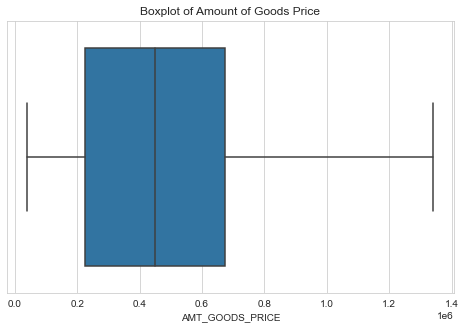

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.title("Boxplot of Amount of Goods Price")
plt.show()

In [80]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 147887
Commercial associate     61000
Pensioner                52256
State servant            19033
Unemployed                  18
Student                     17
Businessman                  3
Maternity leave              3
Name: NAME_INCOME_TYPE, dtype: int64

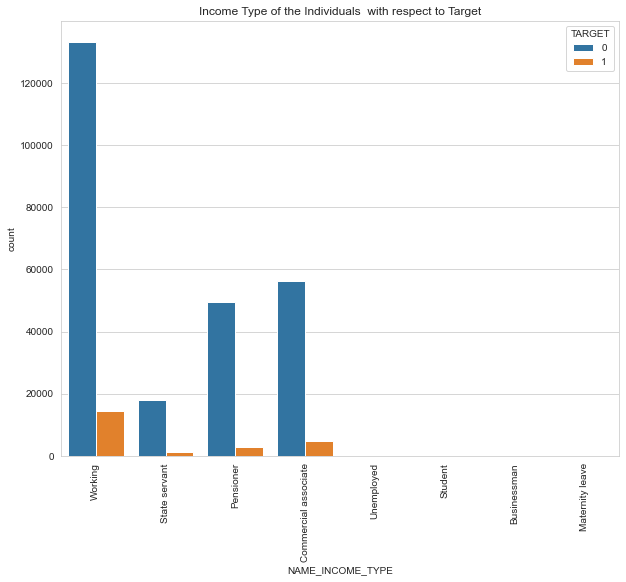

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'NAME_INCOME_TYPE',data=df,hue = 'TARGET')
plt.title("Income Type of the Individuals  with respect to Target")
plt.xticks(rotation = 90)
plt.show()

In [82]:
df['DAYS_BIRTH'].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64

In [83]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(abs(x/365)))

In [84]:
df['DAYS_BIRTH'].value_counts().head()

39    8057
28    7950
38    7868
37    7842
40    7723
Name: DAYS_BIRTH, dtype: int64

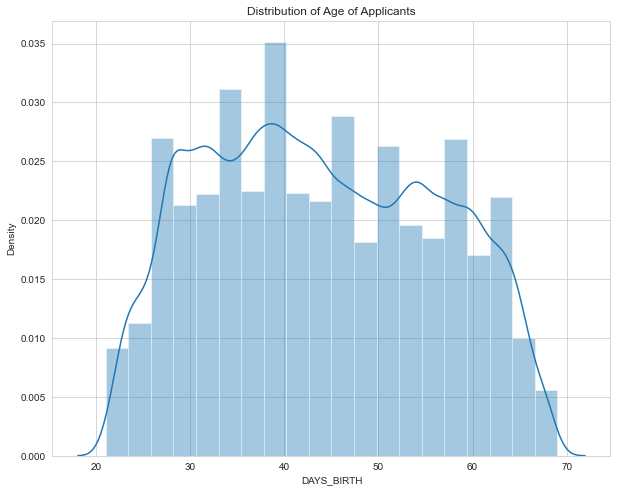

In [85]:
plt.figure(figsize=(10,8))
sns.distplot(df['DAYS_BIRTH'],bins = 20)
plt.title("Distribution of Age of Applicants")
plt.show()

In [86]:
print("Minimum age of the Applicant is  " + str(df['DAYS_BIRTH'].min()))
print("Maximum age of the Applicant is  " + str(df['DAYS_BIRTH'].max()))

Minimum age of the Applicant is  21
Maximum age of the Applicant is  69


In [87]:
df['NAME_EDUCATION_TYPE'].head()

0    Secondary / secondary special
1                 Higher education
2    Secondary / secondary special
3    Secondary / secondary special
4    Secondary / secondary special
Name: NAME_EDUCATION_TYPE, dtype: object

In [88]:
df['NAME_EDUCATION_TYPE'].value_counts().index

Index(['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'], dtype='object')

In [89]:
Education  = {'Secondary / secondary special':'Secondary', 'Higher education':'Higher Edu','Incomplete higher' :"Inc Higher", 'Lower secondary':'Lower secondary', 'Academic degree':'Degree'}

In [90]:
df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].map(Education)

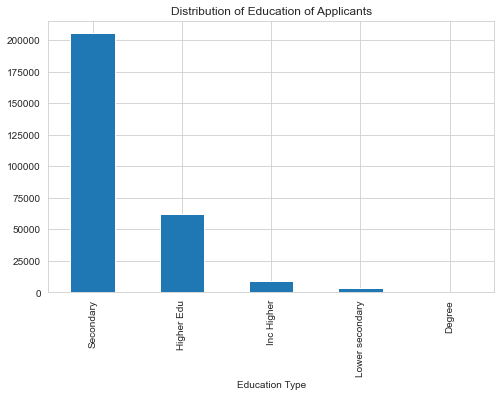

In [91]:
plt.figure(figsize=(8,5))
df['NAME_EDUCATION_TYPE'].value_counts().plot(kind='bar')
plt.title("Distribution of Education of Applicants")
plt.xlabel("Education Type")
plt.show()

In [92]:
df['TARGET'].head() 

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [93]:
df['TARGET'].value_counts()

0    256818
1     23399
Name: TARGET, dtype: int64

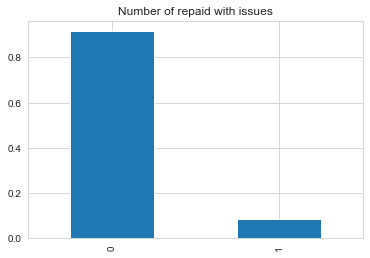

In [94]:
df['TARGET'].value_counts(normalize = True).plot(kind='bar')
plt.title("Number of repaid with issues")
plt.show()

In [95]:
(df['TARGET']==0).sum()

256818

In [96]:
(df['TARGET']==1).sum()

23399

In [97]:
df['TARGET'].sample(5)

304729    0
53974     0
153225    1
279372    0
124830    1
Name: TARGET, dtype: int64

In [98]:
df['TARGET'].value_counts()

0    256818
1     23399
Name: TARGET, dtype: int64

In [99]:
Ratio_of_repaid_with_issue = (df['TARGET']==0).sum() / (df['TARGET']==1).sum()
Ratio_of_repaid_with_issue = round(Ratio_of_repaid_with_issue)
Ratio_of_repaid_with_issue

print( 'The Ratio between the Repayments and the issue payments is  ' + str(Ratio_of_repaid_with_issue))

The Ratio between the Repayments and the issue payments is  11


In [100]:
train_0 = df.loc[df['TARGET'] == 0 ]
train_1 = df.loc[df['TARGET'] == 1 ]

In [101]:
cat_col = list(set(df.columns) - set(df.describe().columns))
cat_col

['NAME_CONTRACT_TYPE',
 'ORGANIZATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_HOUSING_TYPE',
 'FLAG_OWN_REALTY',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'EMERGENCYSTATE_MODE',
 'CODE_GENDER',
 'OCCUPATION_TYPE',
 'NAME_TYPE_SUITE',
 'FLAG_OWN_CAR',
 'NAME_FAMILY_STATUS']

In [102]:
num_col = df.describe().columns
num_col

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
  

In [103]:
len(num_col)

68

In [104]:
def plotting(train, train0, train1, column):
    
    train = train
    train_0=train0
    train_1=train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1=plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x=column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    
    ax3 = plt.subplot(223)
    df=pd.DataFrame()
    
    
    df['0'] = ((train_0[col].value_counts())/len(train_0))
    df['1'] = ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')
    
    fig.tight_layout() #or equivalently, "plt.tight_Layout()"
    
    plt.show()

In [105]:
train_categorical = df.select_dtypes(include =['object']).columns
train_categorical

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE'], dtype='object')

Plotting  NAME_CONTRACT_TYPE


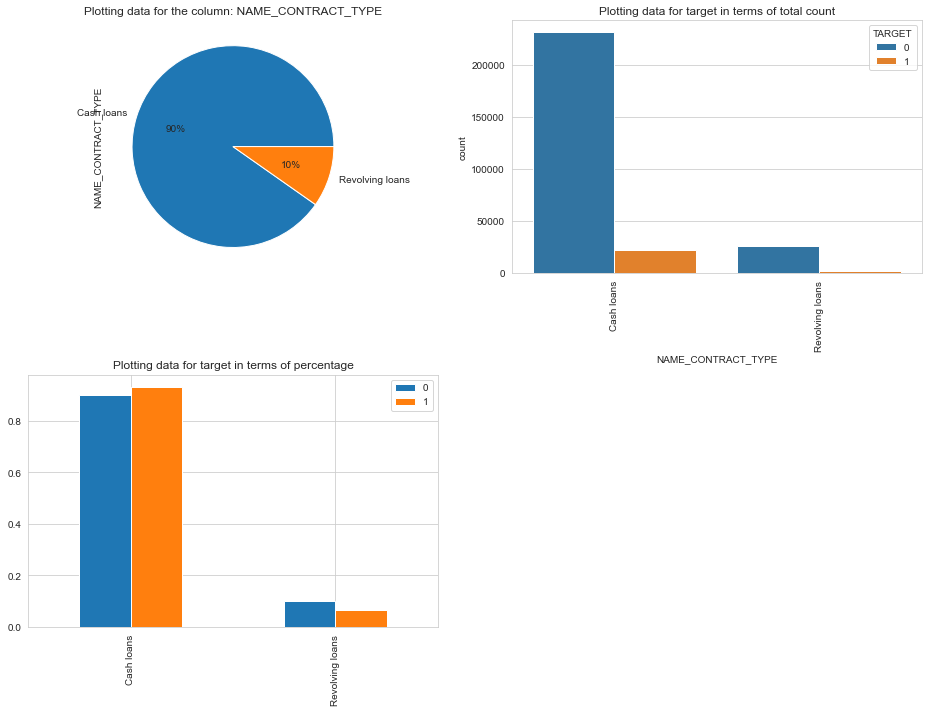

Plotting  CODE_GENDER


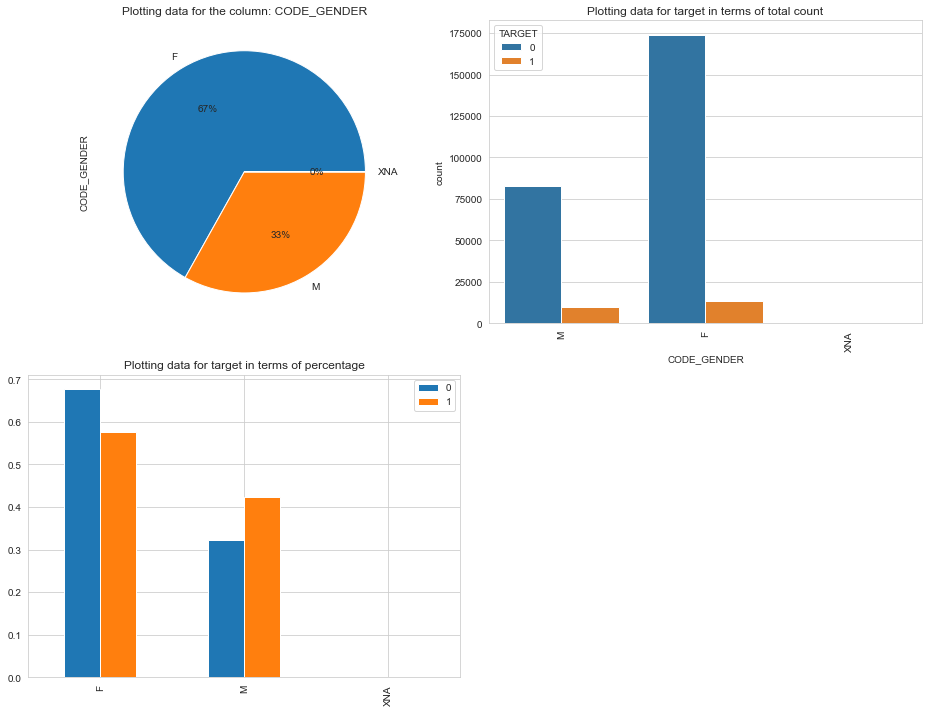

Plotting  FLAG_OWN_CAR


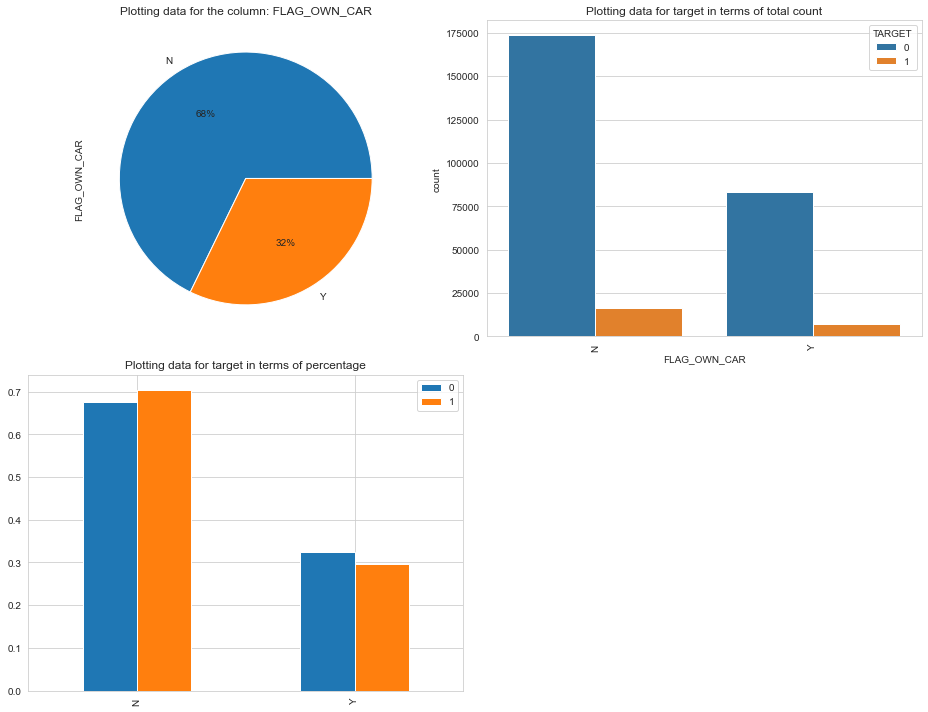

Plotting  FLAG_OWN_REALTY


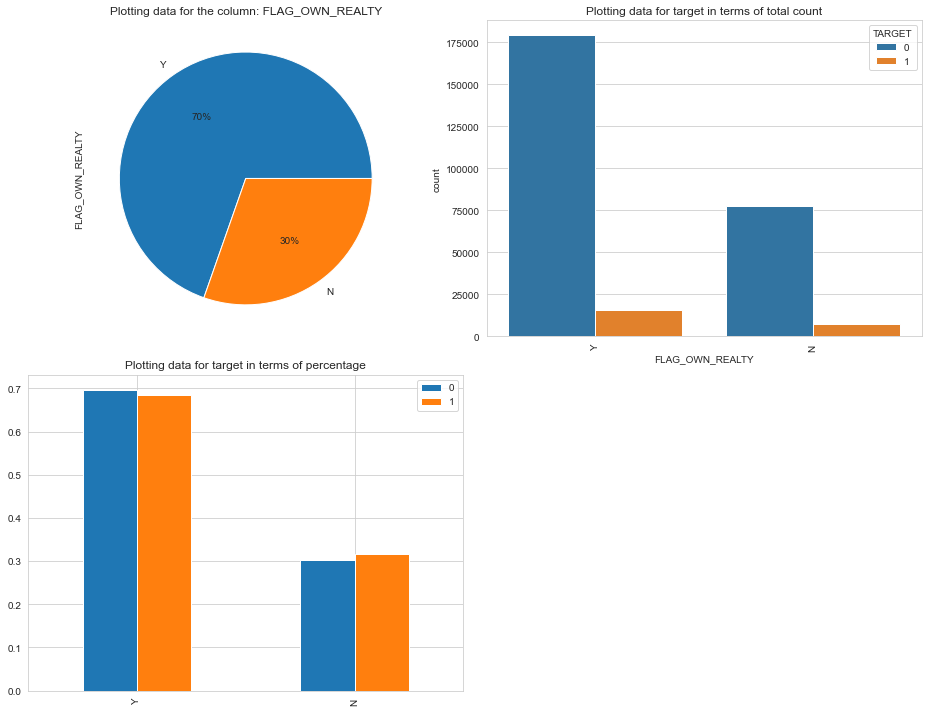

Plotting  NAME_TYPE_SUITE


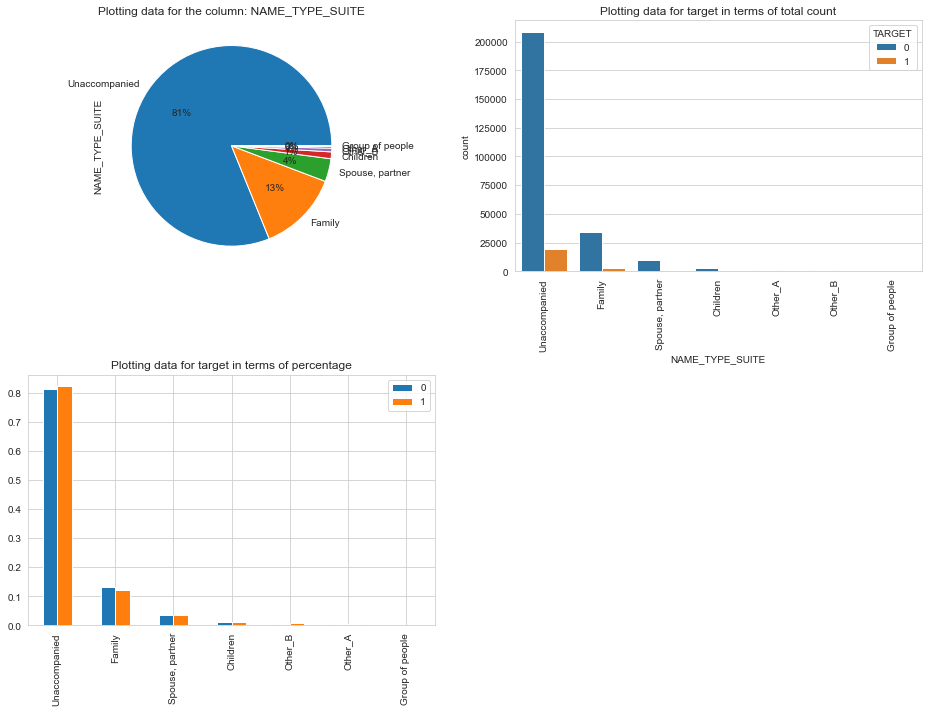

Plotting  NAME_INCOME_TYPE


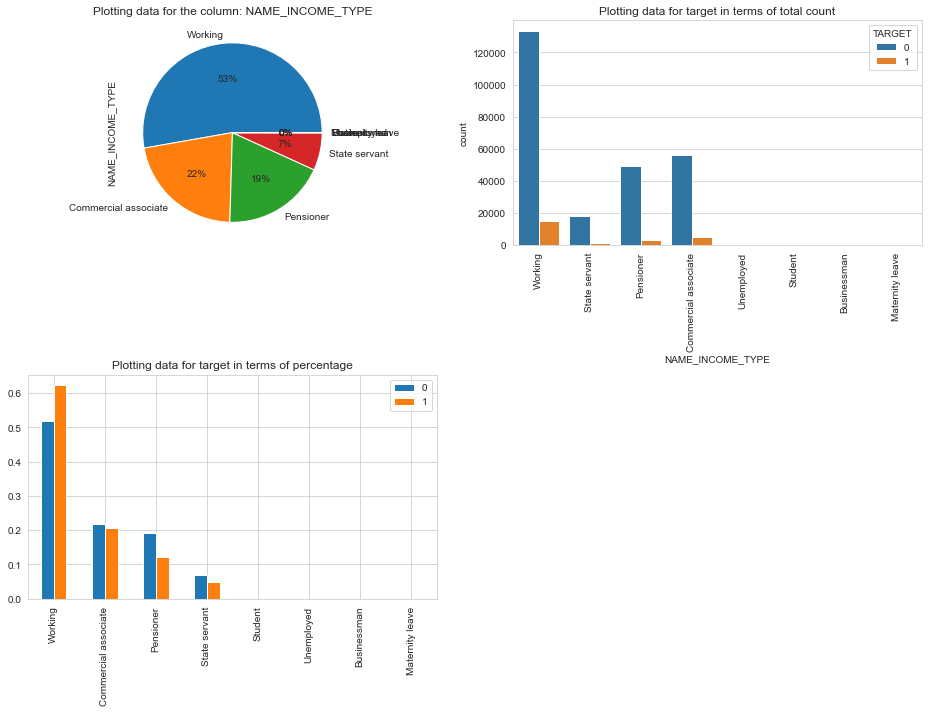

Plotting  NAME_EDUCATION_TYPE


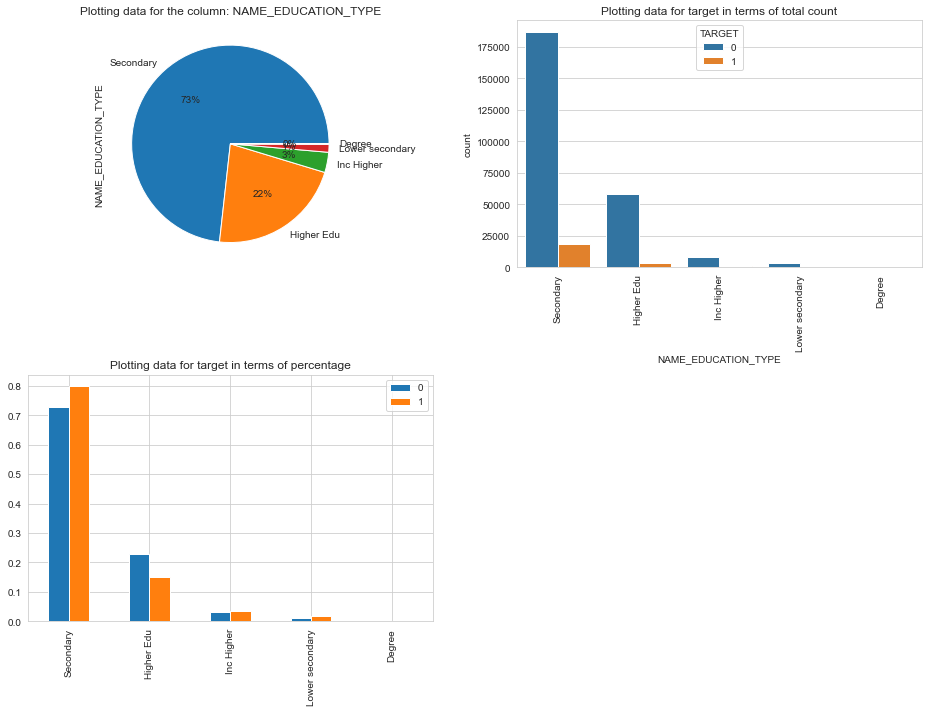

Plotting  NAME_FAMILY_STATUS


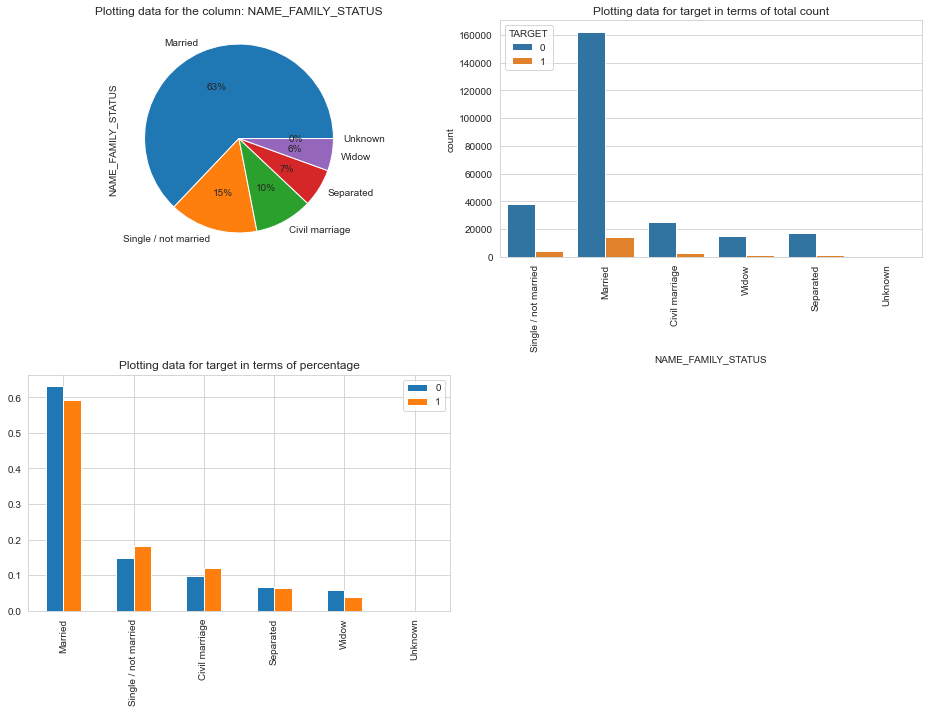

Plotting  NAME_HOUSING_TYPE


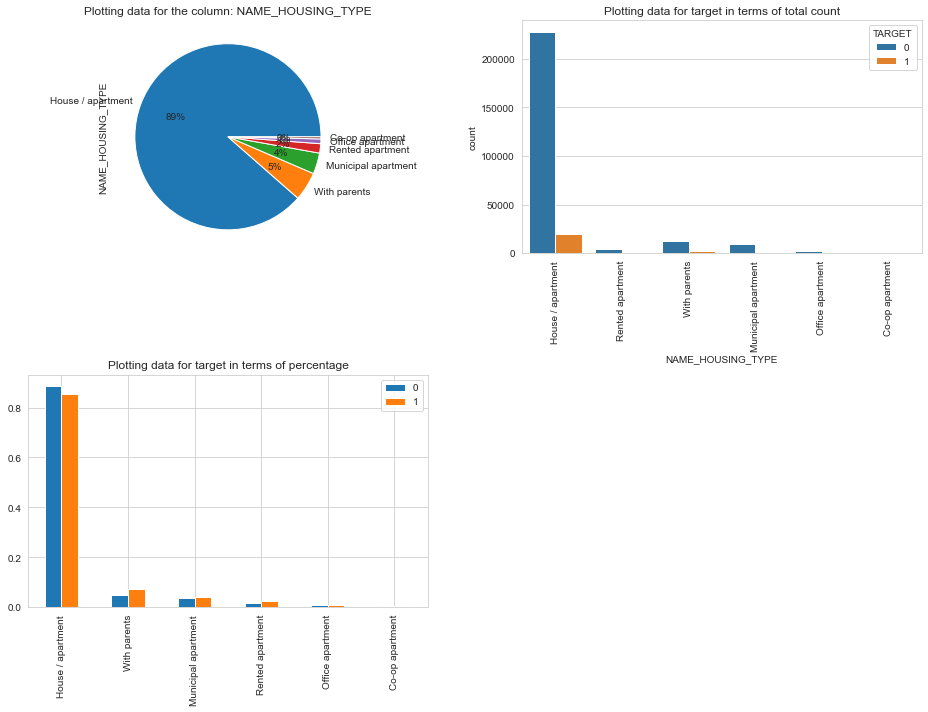

Plotting  OCCUPATION_TYPE


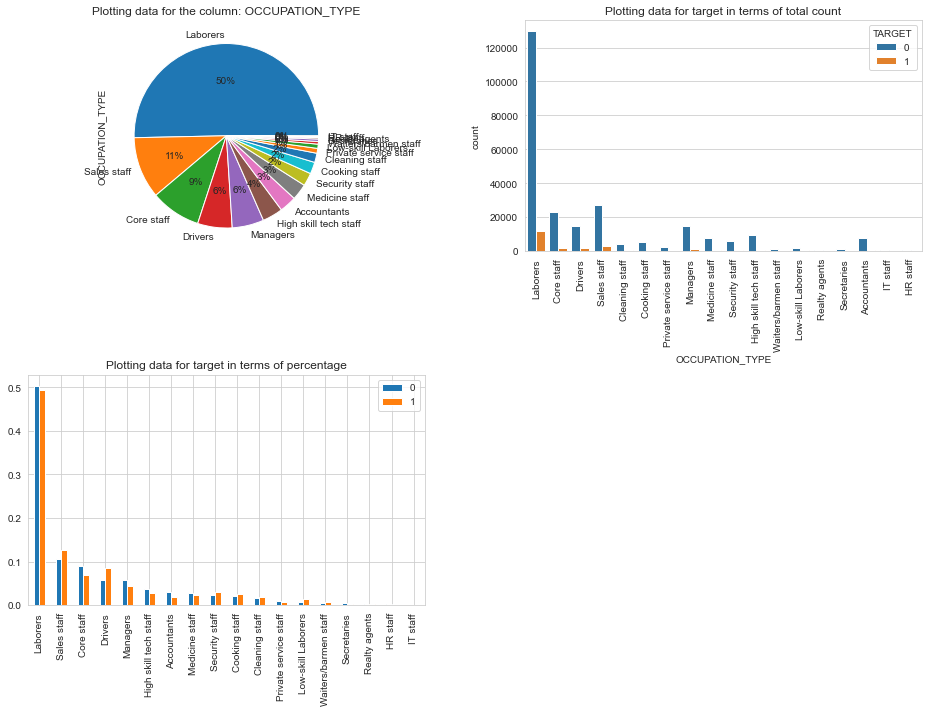

Plotting  WEEKDAY_APPR_PROCESS_START


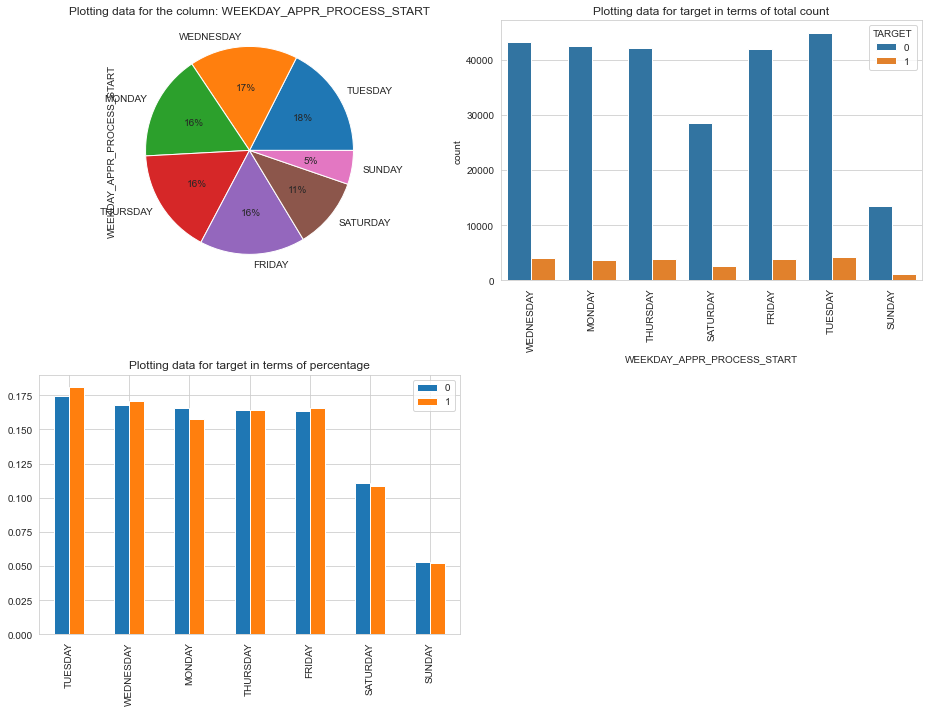

Plotting  ORGANIZATION_TYPE


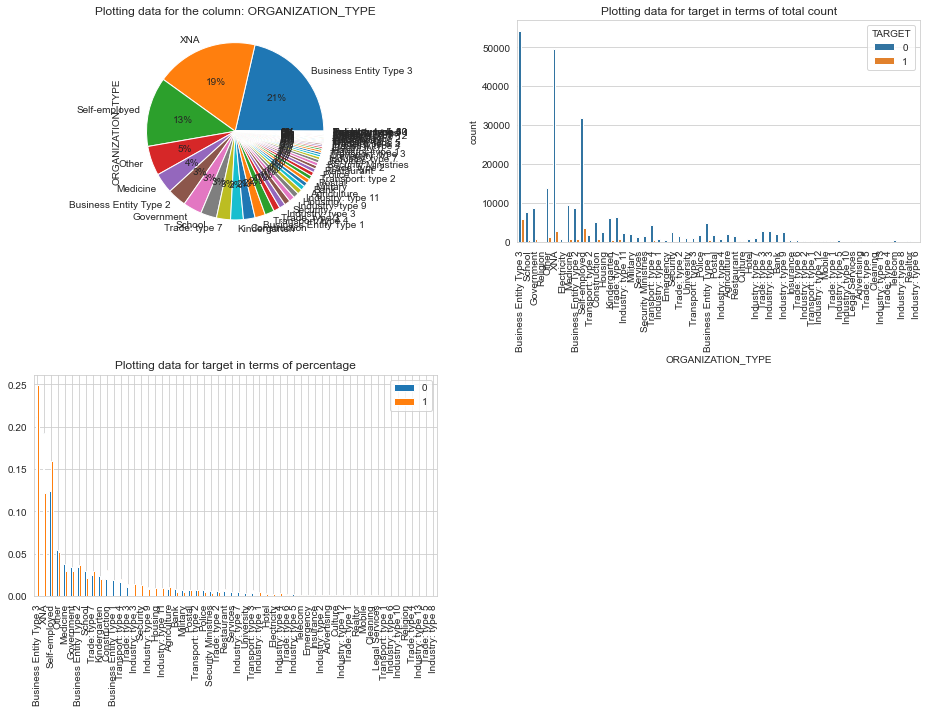

Plotting  EMERGENCYSTATE_MODE


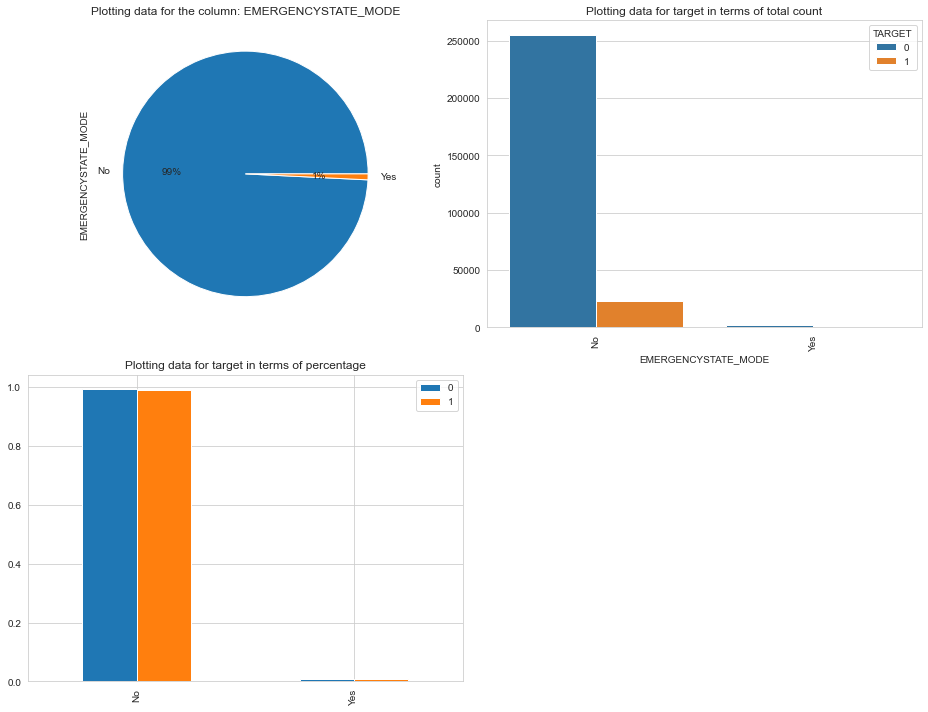

In [106]:
for column in train_categorical:
    print("Plotting ", column)
    plotting(df, train_0, train_1, column)

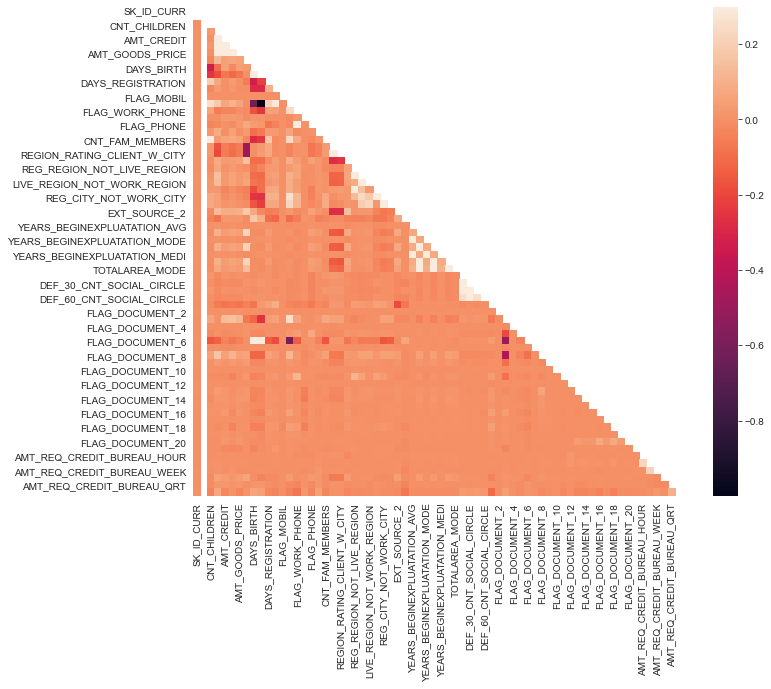

In [117]:
import numpy as np
corr = train_0.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True  
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax = 0.3, square = True);

In [120]:
train_0.corr()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
SK_ID_CURR                      1.000000     NaN     -0.000314          0.003104    0.000623     0.001940         0.001141                    0.001208    0.001101       0.001714          -0.002123        -0.001000  3.069101e-03       -0.001689        -0.000617          0.002934    0.000599   -0.000872        -0.002546             -0.000661                    -0.001128                -0.000625                   -0.000395                    0.001266                     0.003076               -0.002698               -0.002046                 0.000066      0.002073      0.000167                     0.001451       0.002963                      0.001728        0.002765                      0.001261        0.002822       -0.000182                 -0.000737                  0.000803                 -0.000758                  0.002470               -0.001243         0.002116        -0.003961        -0.004491        -0.001172         0.002744        -0.002253         0.001081         0.003098   
TARGET                               NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN           NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN   
CNT_CHILDREN                   -0.000314     NaN      1.000000          0.026639    0.004294     0.022999         0.000016                   -0.026632   -0.339211      -0.249227           0.188992        -0.023966  1.128839e-03        0.250107         0.060549          0.000169   -0.028528    0.021084         0.876851              0.025631                     0.024897                -0.003891                   -0.013422                    0.010381                     0.017295                0.021561                0.075737                 0.074489     -0.017250     -0.038354                     0.003572      -0.008029                      0.003362       -0.008735                      0.003260       -0.008662       -0.007201                  0.016837                 -0.001982                  0.016491                 -0.002047               -0.008080         0.002853         0.063095        -0.003371        -0.015797        -0.163413        -0.001418         0.049358        -0.003956   
AMT_INCOME_TOTAL          

In [121]:
train_0.corr().shape

(68, 68)

In [123]:
train_0.corr().abs()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  EXT_SOURCE_3  YEARS_BEGINEXPLUATATION_AVG  FLOORSMAX_AVG  YEARS_BEGINEXPLUATATION_MODE  FLOORSMAX_MODE  YEARS_BEGINEXPLUATATION_MEDI  FLOORSMAX_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
SK_ID_CURR                      1.000000     NaN      0.000314          0.003104    0.000623     0.001940         0.001141                    0.001208    0.001101       0.001714           0.002123         0.001000  3.069101e-03        0.001689         0.000617          0.002934    0.000599    0.000872         0.002546              0.000661                     0.001128                 0.000625                    0.000395                    0.001266                     0.003076                0.002698                0.002046                 0.000066      0.002073      0.000167                     0.001451       0.002963                      0.001728        0.002765                      0.001261        0.002822        0.000182                  0.000737                  0.000803                  0.000758                  0.002470                0.001243         0.002116         0.003961         0.004491         0.001172         0.002744         0.002253         0.001081         0.003098   
TARGET                               NaN     NaN           NaN               NaN         NaN          NaN              NaN                         NaN         NaN            NaN                NaN              NaN           NaN             NaN              NaN               NaN         NaN         NaN              NaN                   NaN                          NaN                      NaN                         NaN                         NaN                          NaN                     NaN                     NaN                      NaN           NaN           NaN                          NaN            NaN                           NaN             NaN                           NaN             NaN             NaN                       NaN                       NaN                       NaN                       NaN                     NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN              NaN   
CNT_CHILDREN                    0.000314     NaN      1.000000          0.026639    0.004294     0.022999         0.000016                    0.026632    0.339211       0.249227           0.188992         0.023966  1.128839e-03        0.250107         0.060549          0.000169    0.028528    0.021084         0.876851              0.025631                     0.024897                 0.003891                    0.013422                    0.010381                     0.017295                0.021561                0.075737                 0.074489      0.017250      0.038354                     0.003572       0.008029                      0.003362        0.008735                      0.003260        0.008662        0.007201                  0.016837                  0.001982                  0.016491                  0.002047                0.008080         0.002853         0.063095         0.003371         0.015797         0.163413         0.001418         0.049358         0.003956   
AMT_INCOME_TOTAL          

In [126]:
train_0.corr().abs().unstack()

SK_ID_CURR                  SK_ID_CURR                    1.000000
                            TARGET                             NaN
                            CNT_CHILDREN                  0.000314
                            AMT_INCOME_TOTAL              0.003104
                            AMT_CREDIT                    0.000623
                                                            ...   
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_DAY     0.004512
                            AMT_REQ_CREDIT_BUREAU_WEEK    0.019952
                            AMT_REQ_CREDIT_BUREAU_MON     0.003475
                            AMT_REQ_CREDIT_BUREAU_QRT     0.099509
                            AMT_REQ_CREDIT_BUREAU_YEAR    1.000000
Length: 4624, dtype: float64

In [129]:
train_0.corr().abs().unstack().sort_values(kind = 'quicksort')

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    5.338290e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    5.338290e-07
                            FLAG_DOCUMENT_2               1.307621e-06
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_HOUR    1.307621e-06
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_DAY     1.671669e-06
                                                              ...     
AMT_REQ_CREDIT_BUREAU_DAY   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_WEEK  TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_MON   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_QRT   TARGET                                 NaN
AMT_REQ_CREDIT_BUREAU_YEAR  TARGET                                 NaN
Length: 4624, dtype: float64

In [131]:
train_0.corr().abs().unstack().sort_values(kind = 'quicksort').dropna()

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    5.338290e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    5.338290e-07
                            FLAG_DOCUMENT_2               1.307621e-06
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_HOUR    1.307621e-06
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_DAY     1.671669e-06
                                                              ...     
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000e+00
TOTALAREA_MODE              TOTALAREA_MODE                1.000000e+00
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 4489, dtype: float64

In [133]:
correlation_0 = train_0.corr().abs().unstack().sort_values(kind = 'quicksort').dropna()
correlation_0

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    5.338290e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    5.338290e-07
                            FLAG_DOCUMENT_2               1.307621e-06
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_HOUR    1.307621e-06
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_DAY     1.671669e-06
                                                              ...     
DEF_30_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE      1.000000e+00
OBS_30_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      1.000000e+00
TOTALAREA_MODE              TOTALAREA_MODE                1.000000e+00
FLOORSMAX_MODE              FLOORSMAX_MODE                1.000000e+00
AMT_REQ_CREDIT_BUREAU_YEAR  AMT_REQ_CREDIT_BUREAU_YEAR    1.000000e+00
Length: 4489, dtype: float64

In [135]:
correlation_0 = correlation_0[correlation_0 != 1.0]
correlation_0

FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_HOUR    5.338290e-07
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_MOBIL                    5.338290e-07
                            FLAG_DOCUMENT_2               1.307621e-06
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_HOUR    1.307621e-06
FLAG_MOBIL                  AMT_REQ_CREDIT_BUREAU_DAY     1.671669e-06
                                                              ...     
FLOORSMAX_AVG               FLOORSMAX_MEDI                9.969383e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      9.985139e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      9.985139e-01
DAYS_EMPLOYED               FLAG_EMP_PHONE                9.997919e-01
FLAG_EMP_PHONE              DAYS_EMPLOYED                 9.997919e-01
Length: 4422, dtype: float64

In [137]:
correlation_0.tail(10)

FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988536
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.988536
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993739
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993739
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.996938
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.996938
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998514
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998514
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999792
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999792
dtype: float64

In [138]:
corr = train_1.corr()

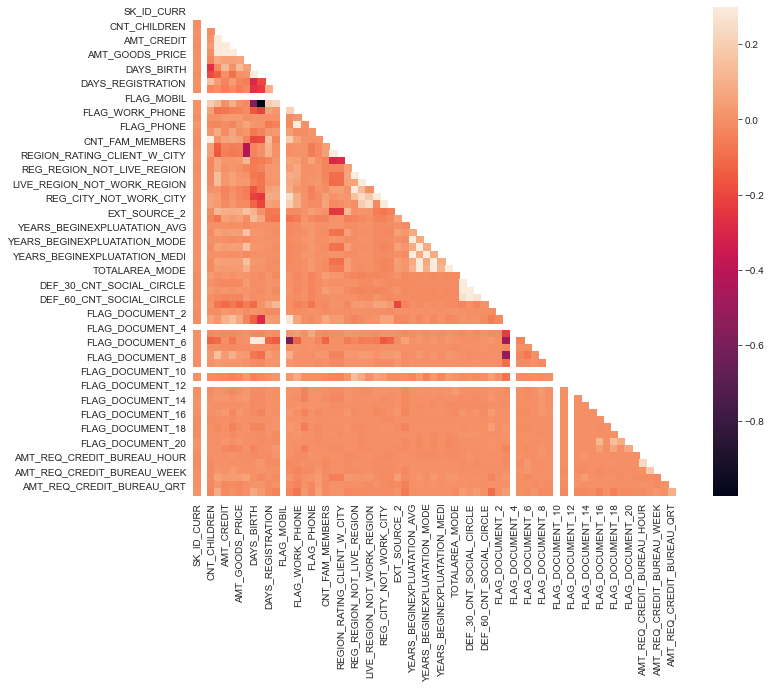

In [140]:
import numpy as np
corr = train_1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True   #automatically mask or hide
f, ax = plt.subplots(figsize = (11,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax = 0.3, square = True);

In [141]:
correlation_1 = train_1.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind = 'quicksort')
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[correlation_1 != 1.0]
print(correlation_1.tail(10))


FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989969
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989969
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.996914
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.996914
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997047
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997047
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998218
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998218
FLAG_EMP_PHONE                DAYS_EMPLOYED                   0.999693
DAYS_EMPLOYED                 FLAG_EMP_PHONE                  0.999693
dtype: float64


In [142]:
train_numerical = df.select_dtypes(include = ['int64', 'float64']).columns
train_numerical

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=106)

In [143]:
df.index

RangeIndex(start=0, stop=307511, step=1)

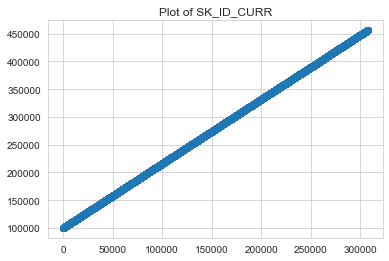

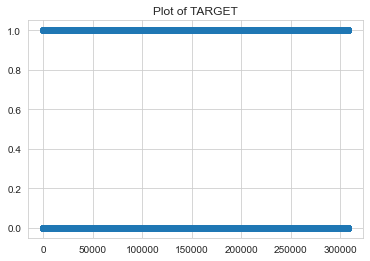

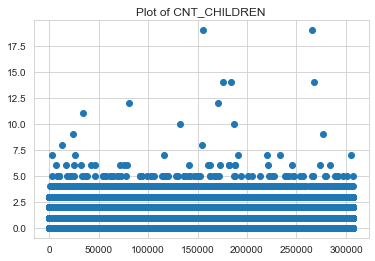

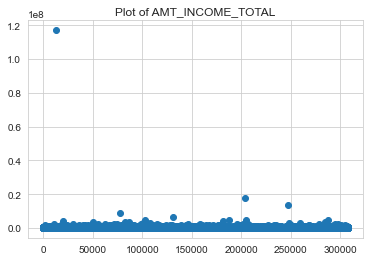

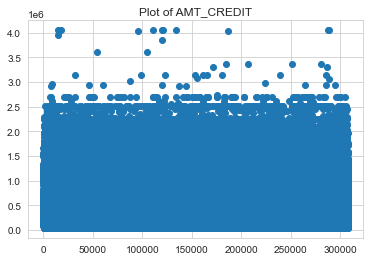

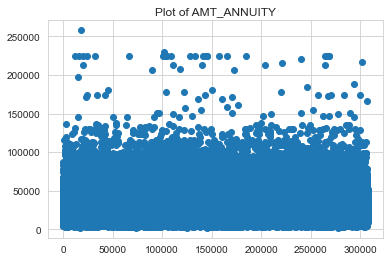

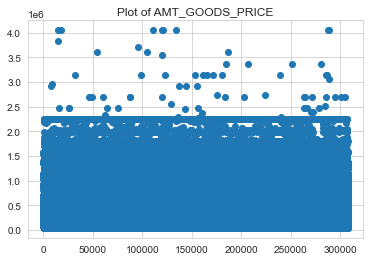

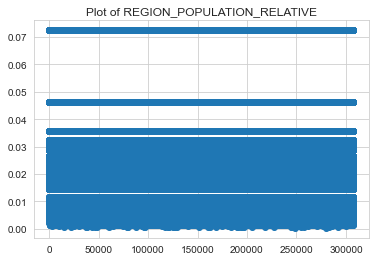

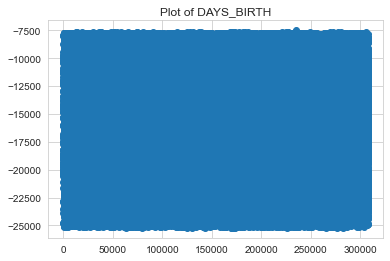

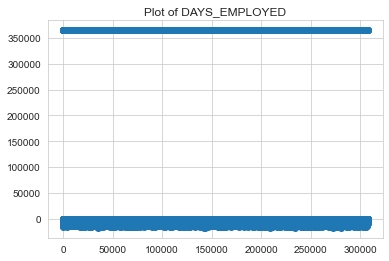

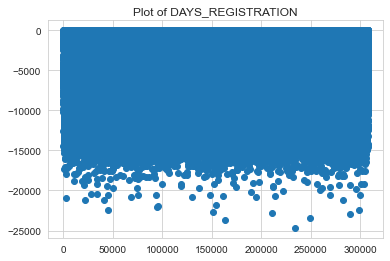

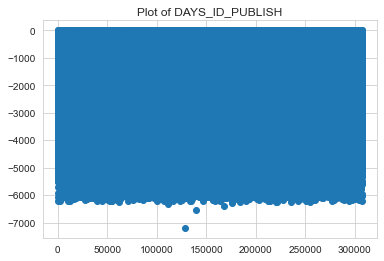

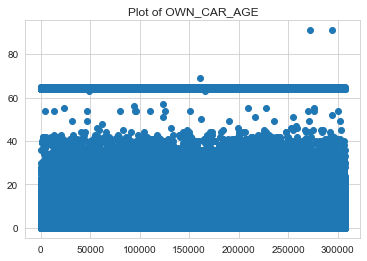

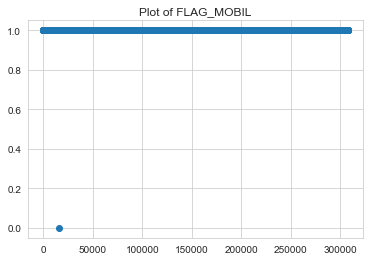

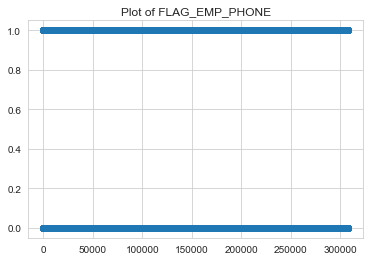

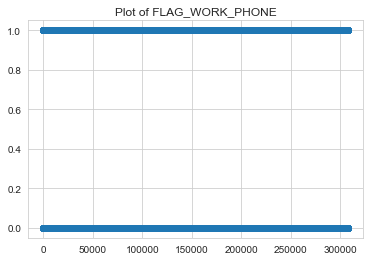

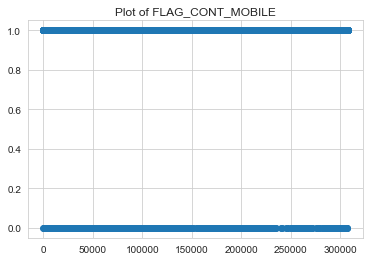

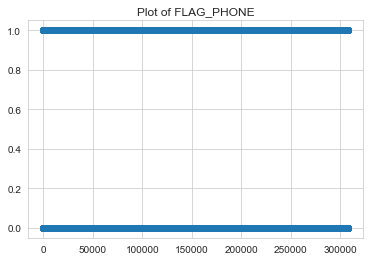

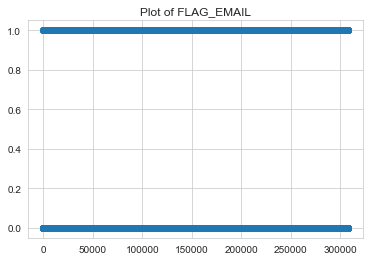

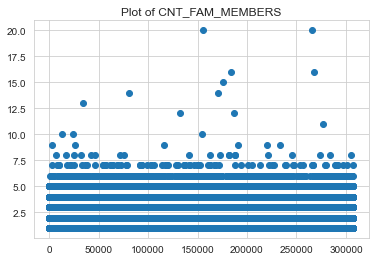

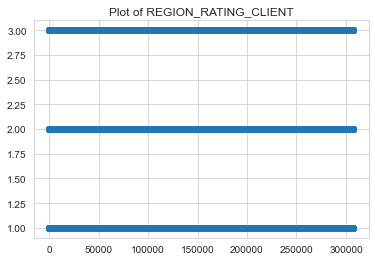

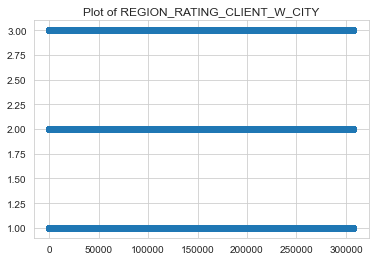

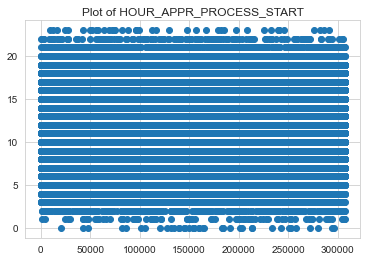

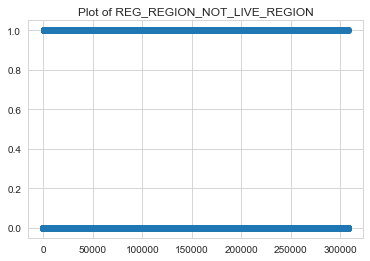

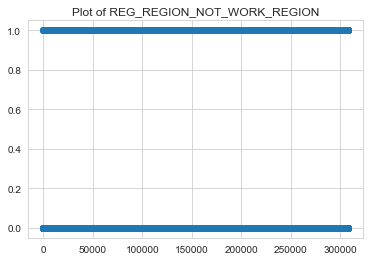

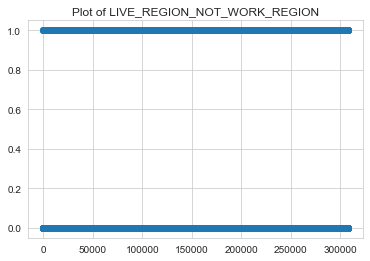

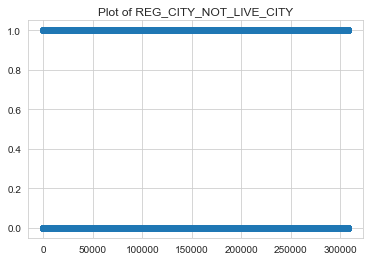

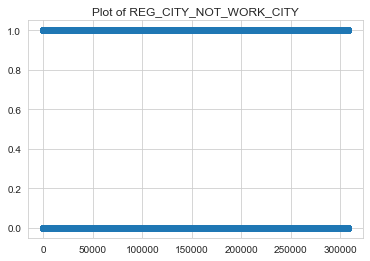

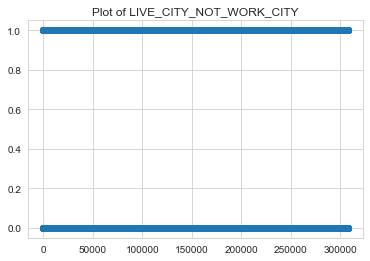

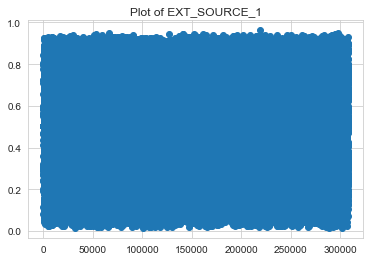

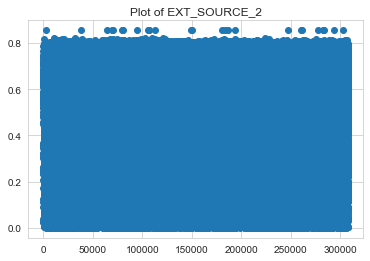

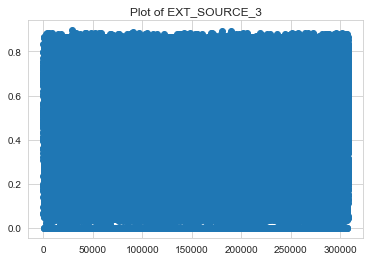

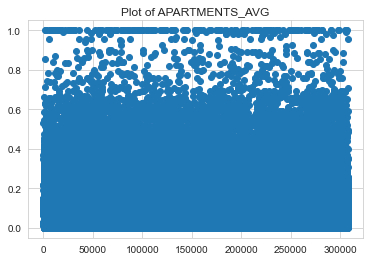

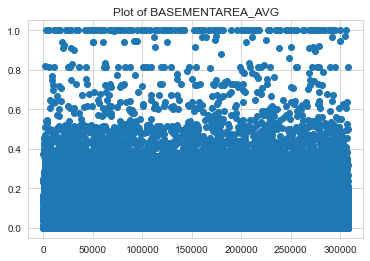

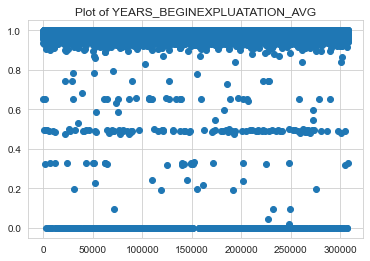

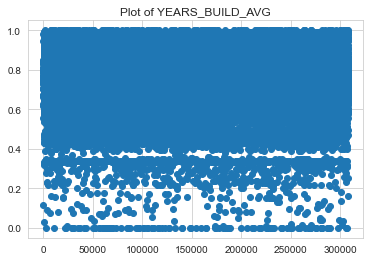

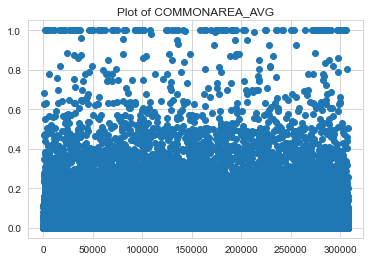

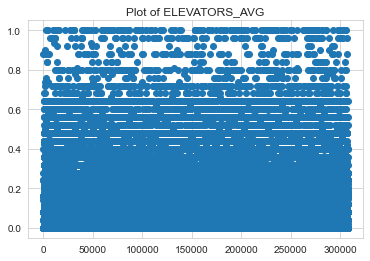

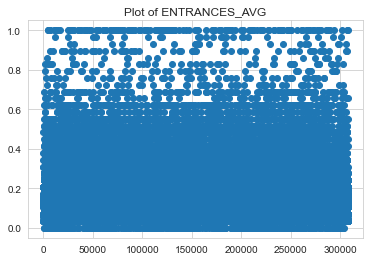

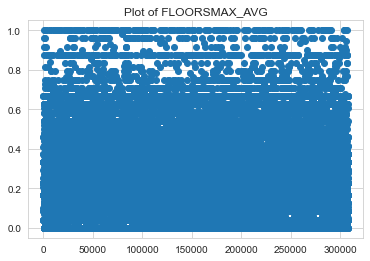

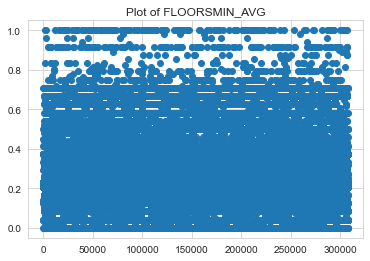

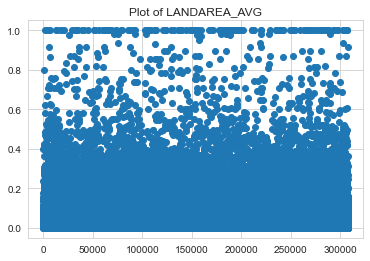

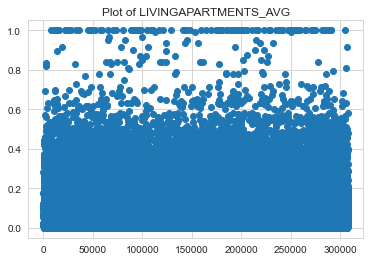

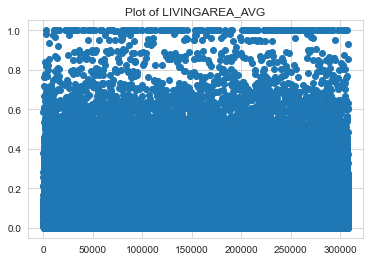

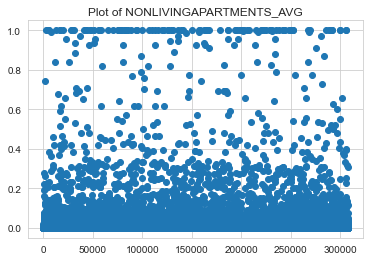

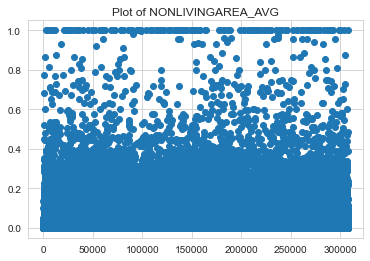

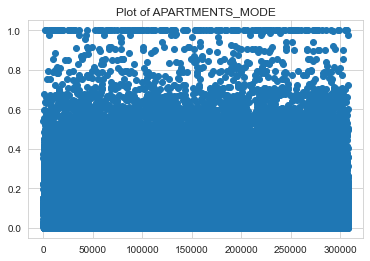

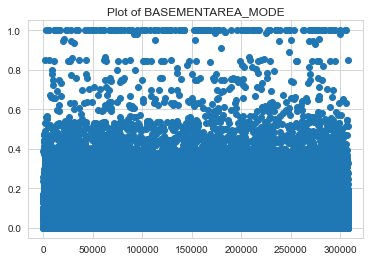

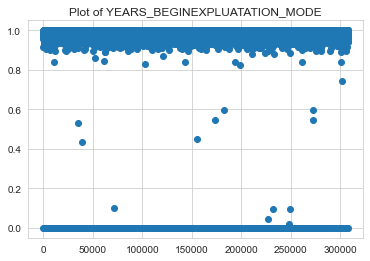

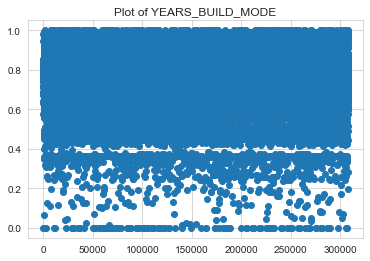

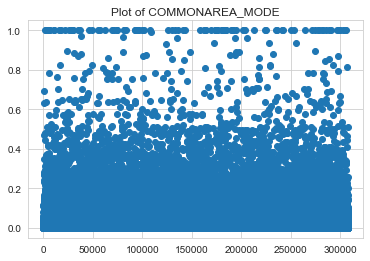

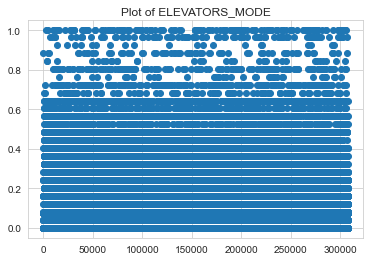

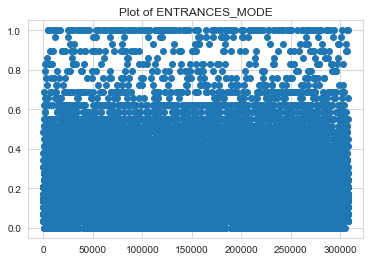

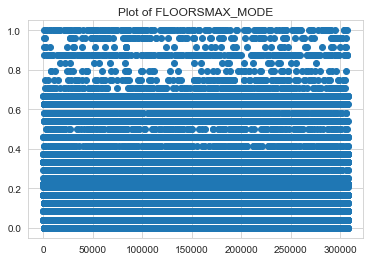

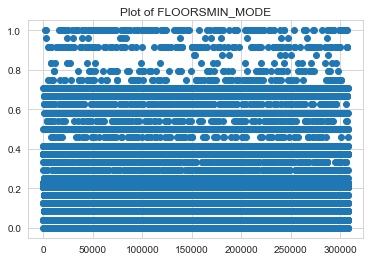

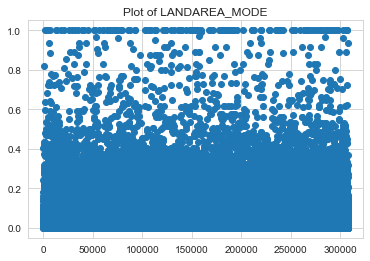

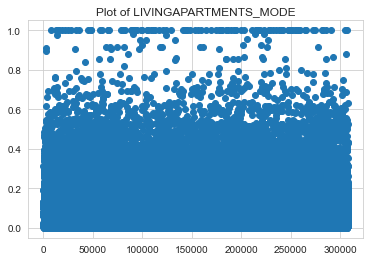

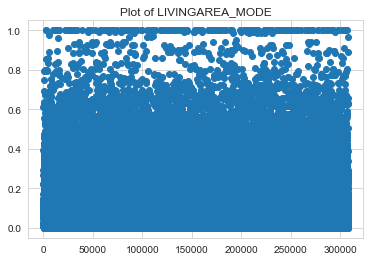

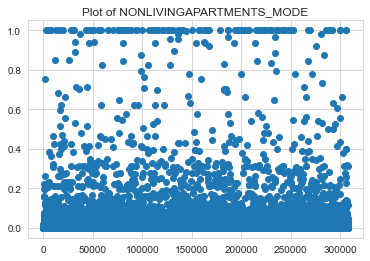

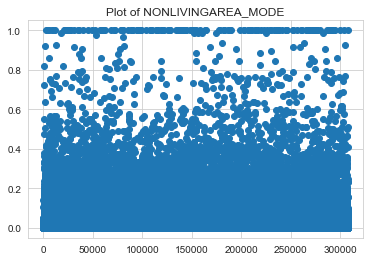

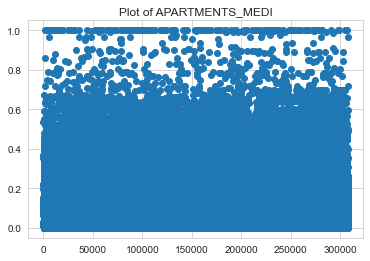

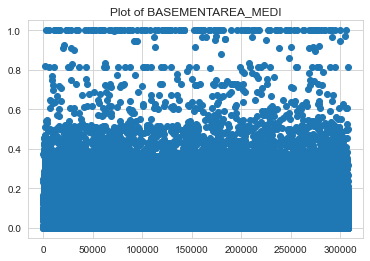

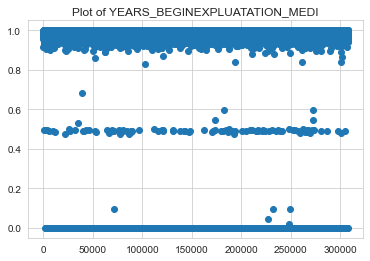

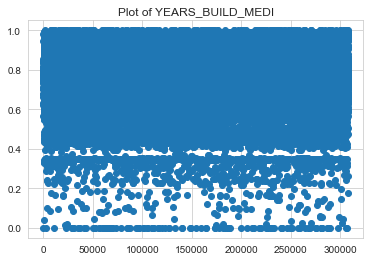

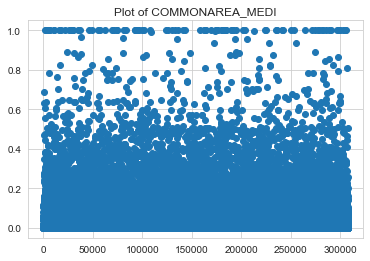

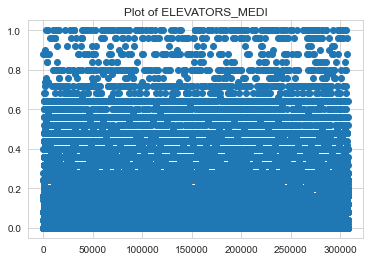

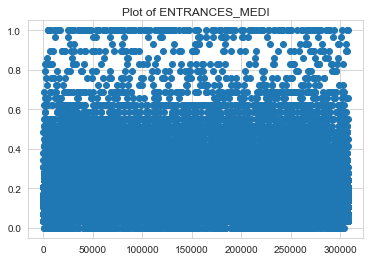

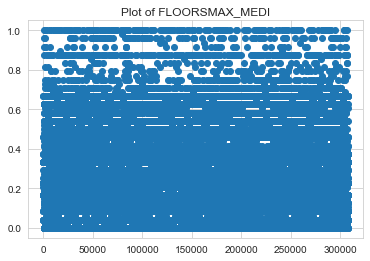

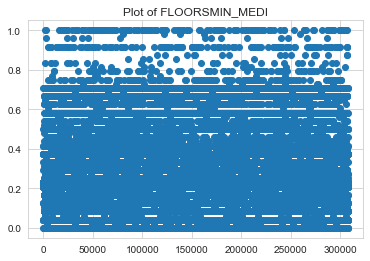

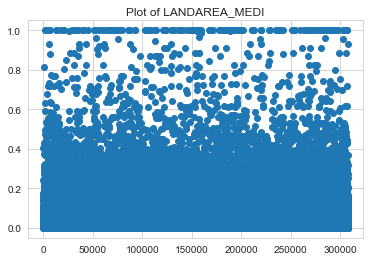

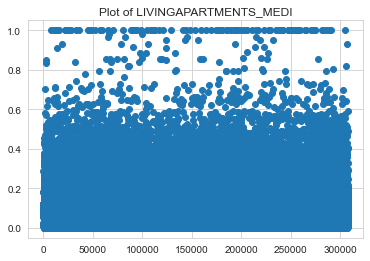

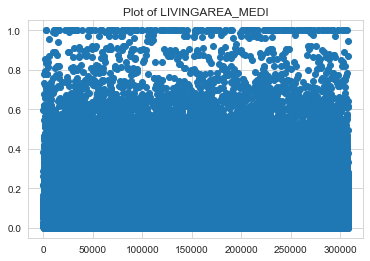

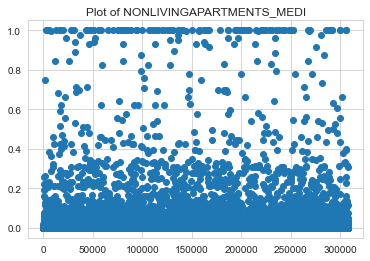

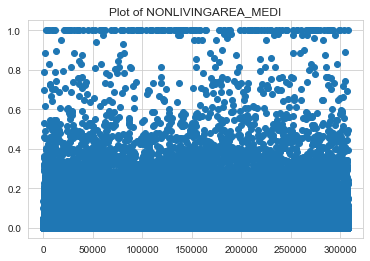

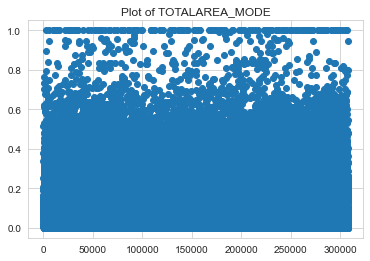

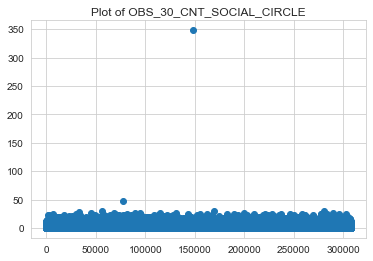

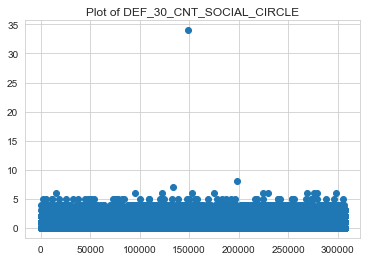

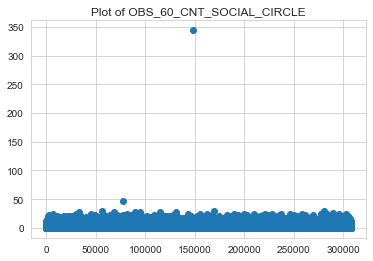

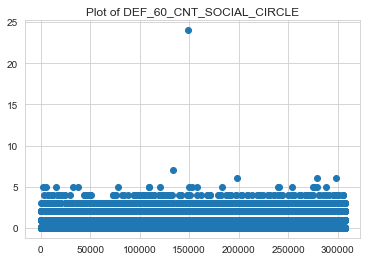

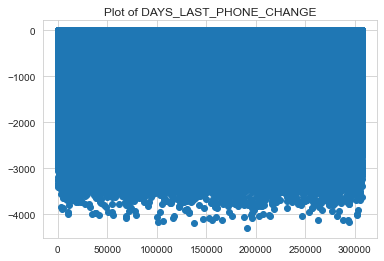

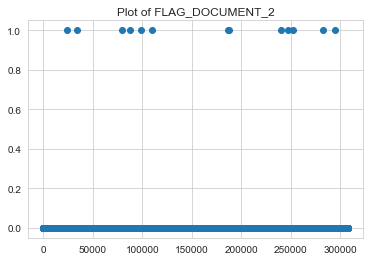

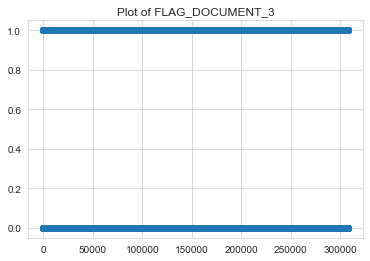

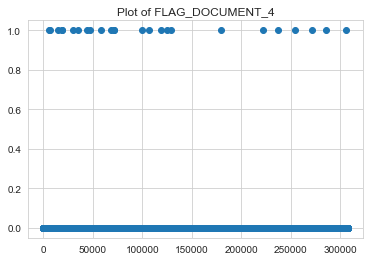

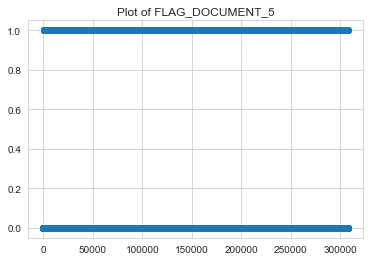

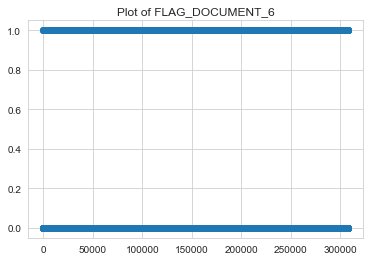

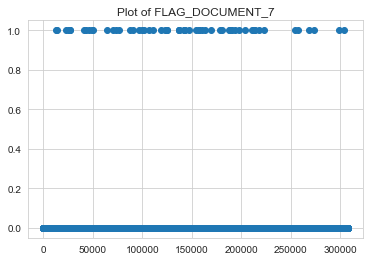

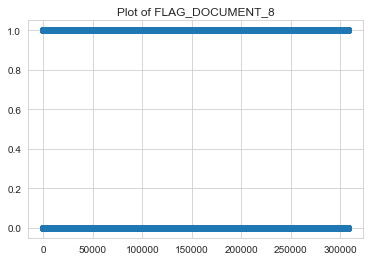

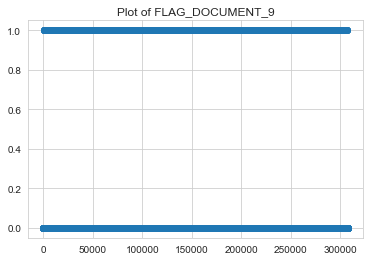

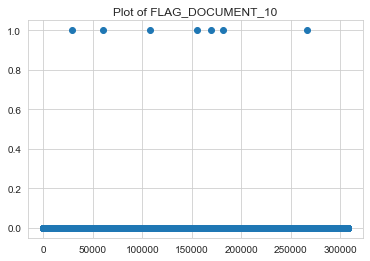

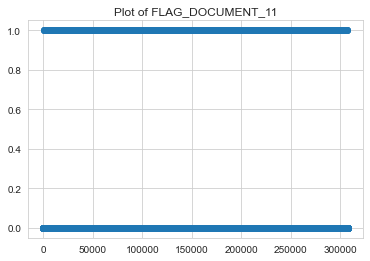

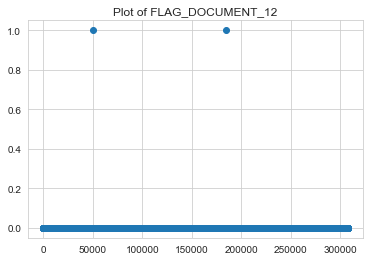

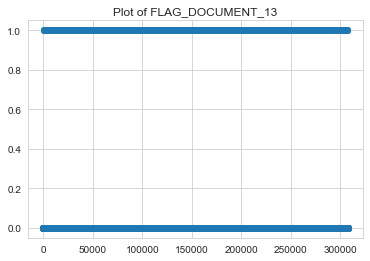

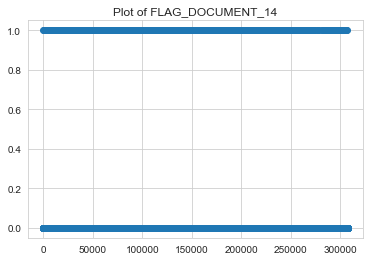

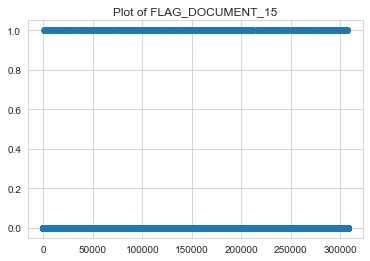

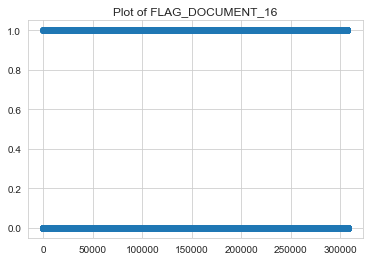

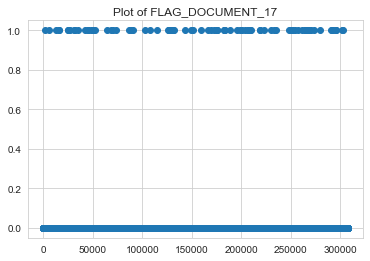

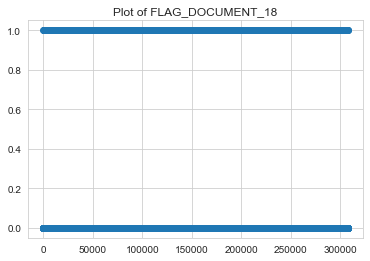

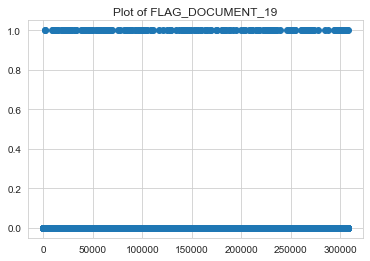

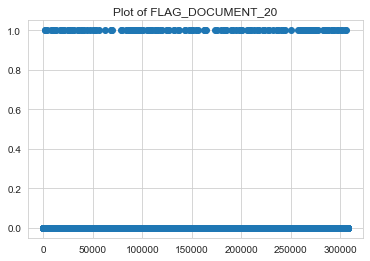

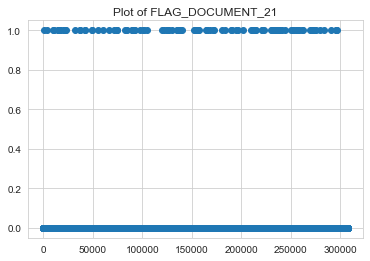

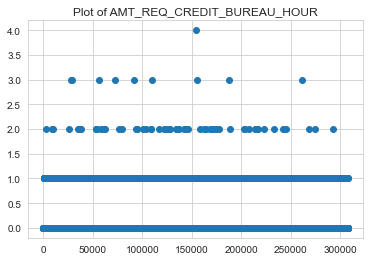

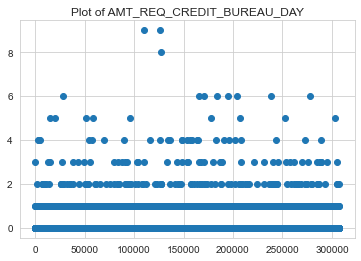

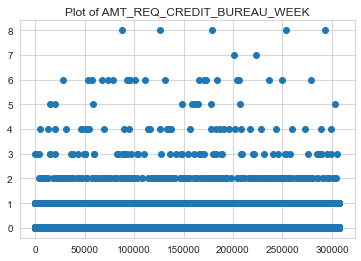

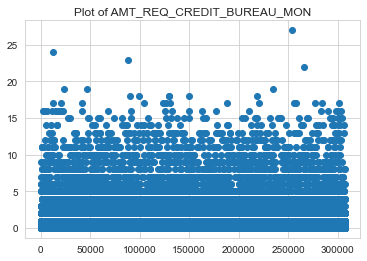

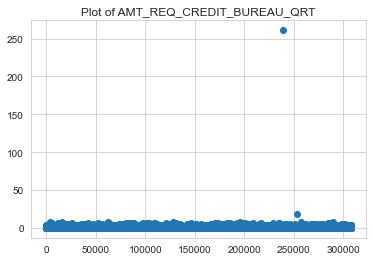

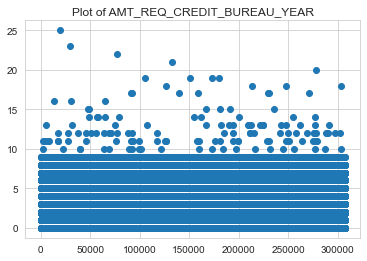

In [144]:
for column in train_numerical:
    plt.scatter(df.index,df[column])
    plt.title("Plot of "+column)
    plt.show()

In [149]:
#Importing the previous application dataset
previous_application = pd.read_csv("previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [150]:
previous_application.shape

(1670214, 37)

In [151]:
previous_application = previous_application.sample(25000) 
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
241399      2446015      196112    Revolving loans     2250.000              0.0     45000.0               NaN              NaN                  WEDNESDAY                       12                           Y                       1                NaN                    NaN                       NaN                    XAP             Approved          -2224                    XNA                XAP             NaN         Repeater                 XNA          Cards            x-sell           Contact center                -1                   XNA          0.0              XNA                  Card X-Sell             -1972.0         -1924.0                   365243.0         -613.0          365243.0                        0.0
981270      2813144      436210         Cash loans    32803.155         450000.0    499896.0               0.0         450000.0                  WEDNESDAY                       10                           Y                       1                0.0                    NaN                       NaN                    XNA             Approved          -2500  Cash through the bank                XAP          Family         Repeater                 XNA           Cash            x-sell  Credit and cash offices                 0                   XNA         24.0           middle          Cash Street: middle            365243.0         -2470.0                    -1780.0        -1780.0           -1775.0                        1.0
1265309     1447792      144080         Cash loans    13558.410         234000.0    259326.0               NaN         234000.0                     FRIDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Canceled           -154  Cash through the bank                XAP   Unaccompanied         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                   XNA         24.0       low_normal             Cash X-Sell: low                 NaN             NaN                        NaN            NaN               NaN                        NaN
1075280     2461013      316682         Cash loans    18406.800         360000.0    360000.0               NaN         360000.0                   THURSDAY                       15                           Y                       1                NaN                    NaN                       NaN                    XNA              Refused           -649                    XNA                 HC             NaN         Repeater                 XNA           Cash            x-sell           Contact center                -1                   XNA         36.0           middle          Cash X-Sell: middle                 NaN             NaN                        NaN            NaN               NaN                        NaN
733775      1766745      154742     Consumer loans    20657.880         106110.0    111712.5               0.0         106110.0                   SATURDAY                        7                           Y                       1                0.0                    NaN                       NaN                    XAP             Appr

In [152]:
previous_application.shape

(25000, 37)

In [153]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [154]:
previous_application.SK_ID_PREV.value_counts()

1703936    1
2269356    1
1809737    1
2757960    1
1372632    1
          ..
2138801    1
1977008    1
1170094    1
2438961    1
1607679    1
Name: SK_ID_PREV, Length: 25000, dtype: int64

In [155]:
previous_train = df.merge(previous_application, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')

In [156]:
previous_train.shape

(21144, 158)

In [157]:
previous_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  \
0      100006       0           Cash loans           F            N               Y             0          135000.0      312682.5        29686.5           297000.0     Unaccompanied               Working  Secondary / secondary special        Civil marriage  House / apartment                    0.008019      -19005          -3039            -9833.0            -2437    12.061091           1               1                0                 1           0           0        Laborers              2.0                     2                            2                    WEDNESDAY                         17                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.502130      0.650442      0.510853         0.11744          0.088442                     0.977735         0.752471        0.044621       0.078942       0.149725       0.226282       0.231894   
1      100034       0      Revolving loans           M            N               Y             0           90000.0      180000.0         9000.0           180000.0     Unaccompanied               Working               Higher education  Single / not married       With parents                    0.030755      -10341          -1010            -4799.0            -3015    12.061091           1               1                0                 1           0           0        Laborers              1.0                     2                            2                      TUESDAY                         16                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.297914      0.502779      0.510853         0.15050          0.083800                     0.983100         0.768800        0.018800       0.160000       0.137900       0.333300       0.375000   
2      100035       0           Cash loans           F            N               Y             0          292500.0      665892.0        24592.5           477000.0     Unaccompanied  Commercial associate  Secondary / secondary special        Civil marriage  House / apartment                    0.025164      -15280          -2668            -5266.0            -3787    12.061091           1               1                0                 1           0           1             NaN              2.0                     2                            2                    WEDNESDAY                         13                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.502130      0.479987      0.410103         0.01240          0.088442                     0.969700         0.752471        0.044621       0.000000       0.069000       0.041700       0.231894   
3      100072       0           Cash loans 

In [159]:
previous_application.columns.value_counts().head()

NAME_PRODUCT_TYPE             1
NAME_PORTFOLIO                1
WEEKDAY_APPR_PROCESS_START    1
DAYS_TERMINATION              1
NFLAG_INSURED_ON_APPROVAL     1
dtype: int64

In [160]:
train_0 = df.loc[df['TARGET'] == 0]
train_1 = df.loc[df['TARGET'] == 1]

In [161]:
ptrain_0 = previous_train.loc[previous_train['TARGET'] == 0]
ptrain_1 = previous_train.loc[previous_train['TARGET'] == 1]

In [162]:
def plotting(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize = (13,10))
    
    ax1 = plt.subplot(221)
    df[col].value_counts().plot.pie(autopct = "%.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+column)
    
    ax2 = plt.subplot(222)
    df1 = pd.DataFrame()
    df1['0'] = ((train_0[col].value_counts())/len(train_0))
    df1['1'] = ((train_1[col].value_counts())/len(train_1))
    df1.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of total count')
    
    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue = hue, data =ptrain_0, ax=ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 interms of percentage')
    
    ax4 = plt.subplot(224)
    sns.countplot(x=col, hue=hue, data=ptrain_1, ax=ax4)
    plt.xticks(rotation=90)
    
    fig.tight_layout()
    
    plt.show()

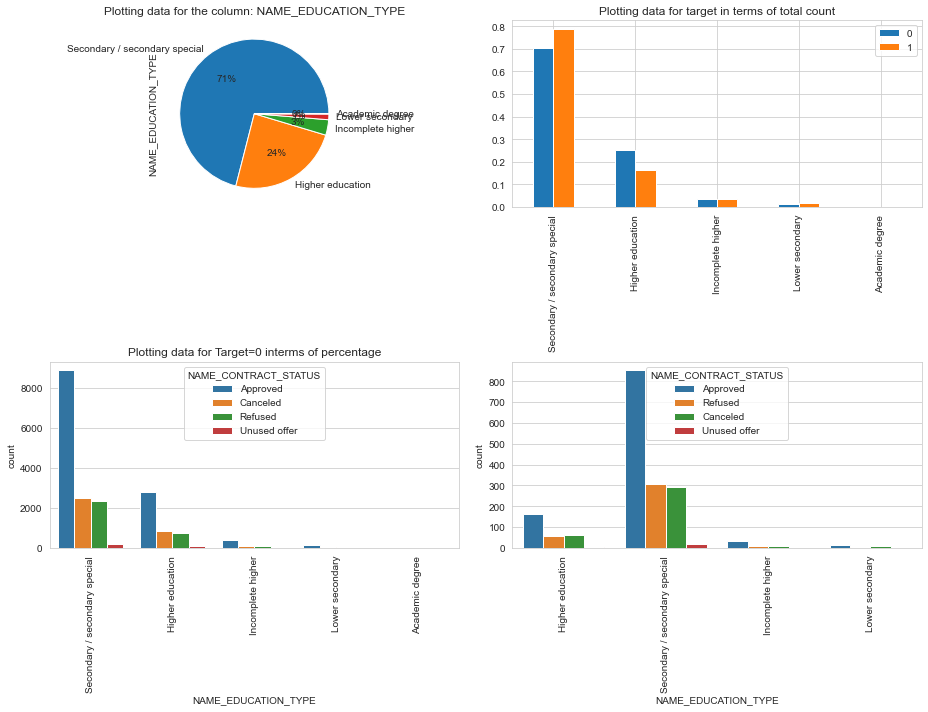

In [164]:
plotting('NAME_EDUCATION_TYPE', 'NAME_CONTRACT_STATUS')

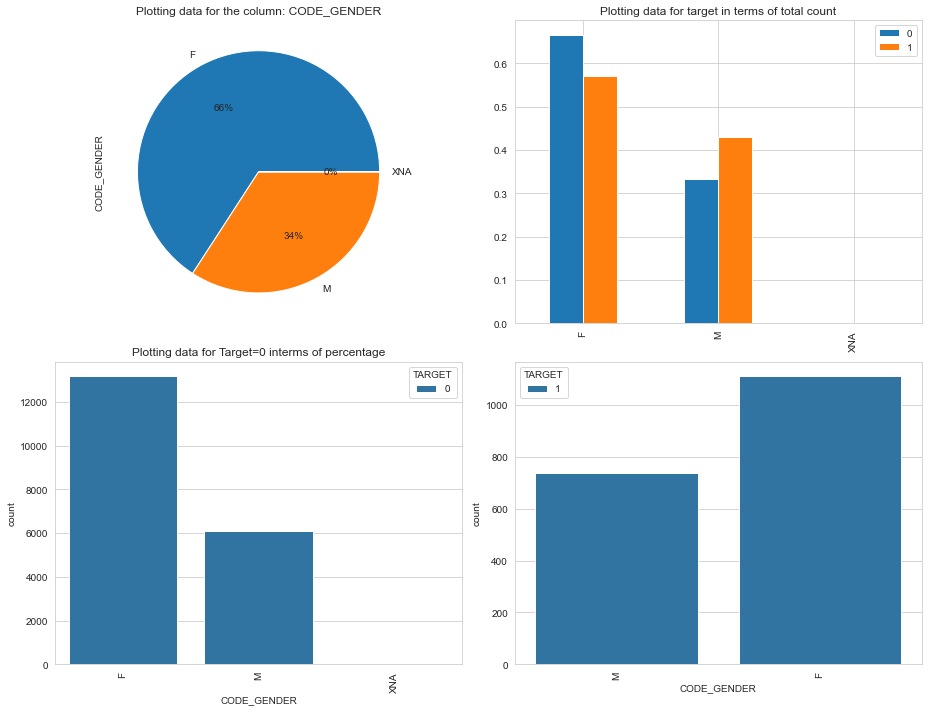

In [165]:
plotting('CODE_GENDER', 'TARGET')